This kernel focuses on comprehensively understanding factors influencing mental health in the workplace, utilizing a 2014 survey dataset measuring attitudes and frequency of mental health disorders in the tech industry. Unlike traditional kernels, we prioritize a systematic exploration of mental health.

The initial step involves gaining domain knowledge. This notebook is distinctive in its approach, starting with a detailed explanation of Prostate Cancer and its detection. From there, the discussion seamlessly transitions to the dataset, conducts exploratory data analysis (EDA), and establishes a baseline model.




Mental health at the workplace encompasses the emotional, psychological, and social well-being of individuals. It influences thoughts, feelings, actions, stress management, interpersonal relationships, and decision-making. Effective communication and inclusion are vital skills for successful teams and employees.

The repercussions of poor mental health on an organization are substantial, manifesting in increased absenteeism, decreased productivity, and lower engagement levels. In the United States, around 70% of adults with depression are part of the workforce. Employees grappling with depression contribute to an estimated 35 million missed workdays annually. Moreover, unresolved depression leads to a significant 35% decline in productivity, translating to a staggering cost of $105 billion for employers each year. Addressing mental health in the workplace is crucial for fostering a healthier and more productive professional envirot.nmen




Employers can support mental health through Mental Health First Aid training, teaching employees to identify and assist colleagues facing mental health challenges. This enhances communication skills, boosts awareness, and promotes timely intervention, fostering a supportive workplace.

Comprehensive benefit packages, including Employee Assistance Programs, wellness initiatives, and flexible work policies, contribute to a healthy work environment. Organizations championing mental health awareness reduce stigma, elevate literacy, and empower employees to respond responsibly to mental health concerns.

By embracing mental health initiatives, workplaces become community leaders, initiating dialogues and providing support for individuals 





l.

In [2]:
import warnings 
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [3]:
df=pd.read_csv("survey.csv")

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness


*Age:Age of the employee
*Gender:Gender of the employee
*Country:Country to which the employee belongs
*state: If the employee lives in the United States, which state or territory does he/she live in?
*self_employed: Is the employee self-employed?
*family_history: Does the employee have a family history of mental illness?
*treatment: Has the employee sought treatment for a mental health condition?
*work_interfere: If the employee has a mental health condition, does he  feel that it interferes with his work?
*no_employees: How many employees does the company or organization have?
*remote_work: Does the employee work remotely (outside of an office) at least 50% of the time?
*tech_company: Is the employer primarily a tech company/organization?
*benefits: Does the employer provide mental health benefits?
*care_options: Does the employee know the options for mental health care his/her employer provides?
*wellness_program: Has the employer ever discussed mental health as part of an employee wellness program?
*seek_help: Does the employer provide resources to learn more about mental health issues and how to seek help?
*anonymity: Is the anonymity protected if the employee chooses to take advantage of mental health or substance abuse treatment resources?
*leave: How easy is it for the employee to take medical leave for a mental health condition?
*mentalhealthconsequence: Does the employee think that discussing a mental health issue with his/her employer would have negative consequences?
*physhealthconsequence:Does the employee think that discussing a physical health issue with his/her employer would have negative consequences?
*coworkers: Would the employee be willing to discuss a mental health issue with his/her coworkers?
*physhealthinterview: Would the employee bring up a physical health issue with a potential employer in an interview?
*mentalvsphysical: Does the employee feel that your employer takes mental health as seriously as physical health?
*obs_consequence: Has the employee heard of or observed negative consequences for coworkers with mental health conditions in the workplace?
*comments: Any additional notes or comments


There are a total of 26 columns in the dataset.
We see that except the age column, all the columns are of object datatype.
Comment column seems to contain most number ( 70% ) of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.
We will be dropping the timestamp column becauset's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.
The state column also contains a lot of null values. We'll dig deeper into that.

In [6]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())


Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

It will be really misleading to conclude that a certain country faces more problem with the mental health of employees because around 60% of the people belong to The US.
Moreove,r there are a lot of countries which have only one responeents.
The country column thus becomes pointless. We will ber dopping this.
A quick look at the states suggest us that it is applicable for the one's only in The US, so we'll drop it as well.

In [7]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [8]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,Jun-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,Jun-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
print("The dataset contains different age groups including: \n")
print(df['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

How can age be negative? And age below 15 years? Are they even legally allowed to work?
Regarding the gender, people have described themselves as male and females in such different ways!

On a lighter note, this is what happens when you don't take survey questions like this in the form of checkboxes! 😁😁

Lets get back to our work and correct these responses. While this may not be the best way, we will be using this approach for gender column: We will be renaming and combining all the categories that mean the same into one.

Male, or cis Male, means born as male and decide to be male.
Female, or cis Female, means born as female and decide to be female.
Other, is a word that describes sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other.

In [10]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [11]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Gender
Male      988
Female    247
Other      19
Name: count, dtype: int64

Certainly, it's important to recognize the gender distribution discrepancy in the dataset. With four times as many males as females, caution is necessary to avoid making assumptions about gender-based susceptibility to mental health issues. It's crucial to remain aware that the dataset's composition may not accurately represent the actual prevalence of mental health concerns among different genders.

An alternative perspective could be that the tech industry, specifically targeted by this research, may have a significantly higher male representation compared to females. This observation underscores the need to interpret findings within the context of the dataset's inherent gender imbalance, refraining from generalizations about gender-related mental health patterns in the broader population.

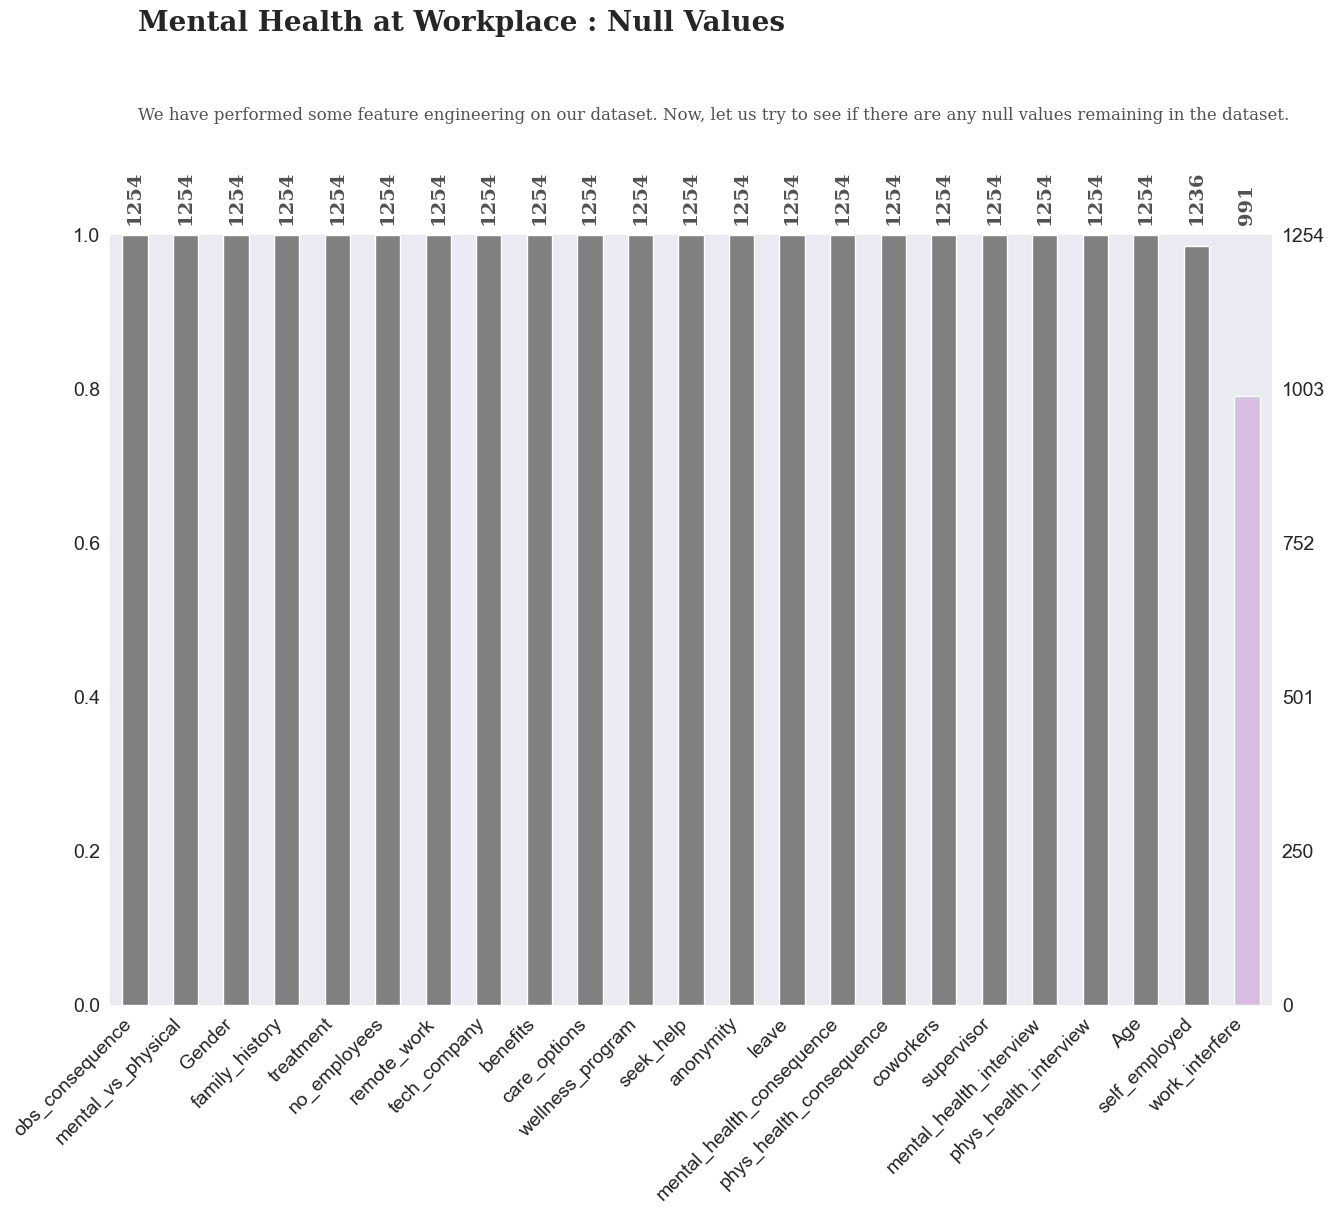

In [12]:
import missingno as msno
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

There's only one column which is 'work_interfere' remaining that contains null values. For now we will proceed without any imputation.
Actually, there's another column, 'self_employed' which contains around 18 null values which we failed to notice at first.
Now let us move forward and perform E.DA

Before begining with the EDA which should learn about the organization which has collected this data.
The dataset is from Open Sourcing Mental Illness (OSMI), a non-profit dedicated to promoting mental wellness in the tech and open source communities. Founded in 2013 by Ed Finkler, the organization educates and provides resources for mental health support.

The survey, conducted annually since 2013, focuses on how tech industry employees seek mental health treatment globally. This 2014 dataset comprises responses from individuals with mental health disorders, diagnosed or undiagnosed. The goal is to identify factors influencing employees' willingness to seek treatment.

This research aims to assist HR professionals in understanding and supporting employees' mental health needs. By leveraging machine learning, the study seeks to highlight factors that companies should address to encourage employees to seek mental health treatment. Let's delve into understanding the target data.

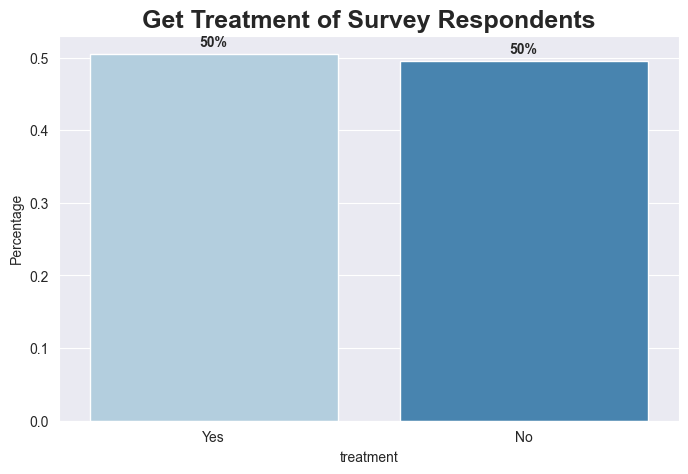

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')


This is the respondents result of question, 'Have you sought treatment for a mental health condition?'.

This is our target variable. Looking at the first graph, we see that the percentage of respondents who want to get treatment is exactly 50%. Workplaces that promote mental health and support people with mental disorders are more likely to have increased productivity, reduce absenteeism, and benefit from associated economic gains. If employees enjoy good mental health, employees can:
    *Be more productive
    *Take active participation in employee engagement activities and make better relations; both at workplace and personal life.
    *Be more joyous and make people around them happy.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


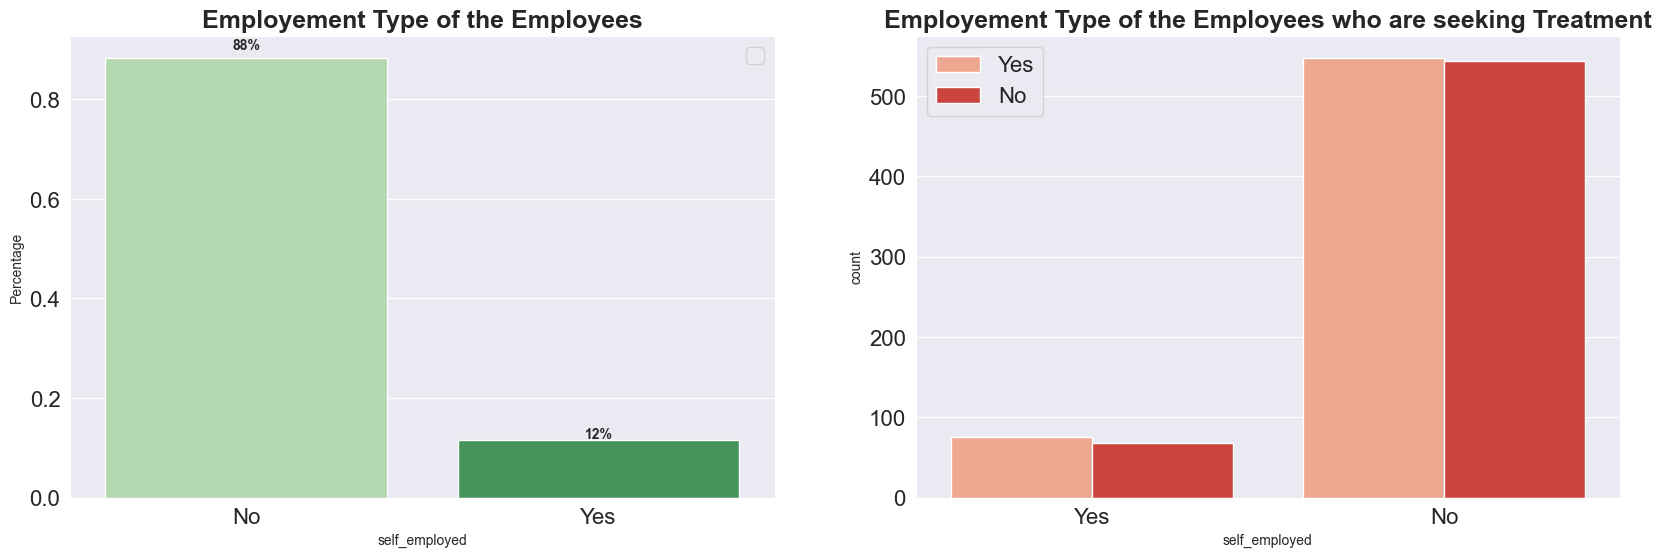

In [14]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Reds')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

This is respondent's answer to the question, 'Are you self-employed?'.

We see that the number of people who are self employed are around 10%. Most of the people who responded to the survey belonged to working class. We also see that though there is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar.

Thus, we may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


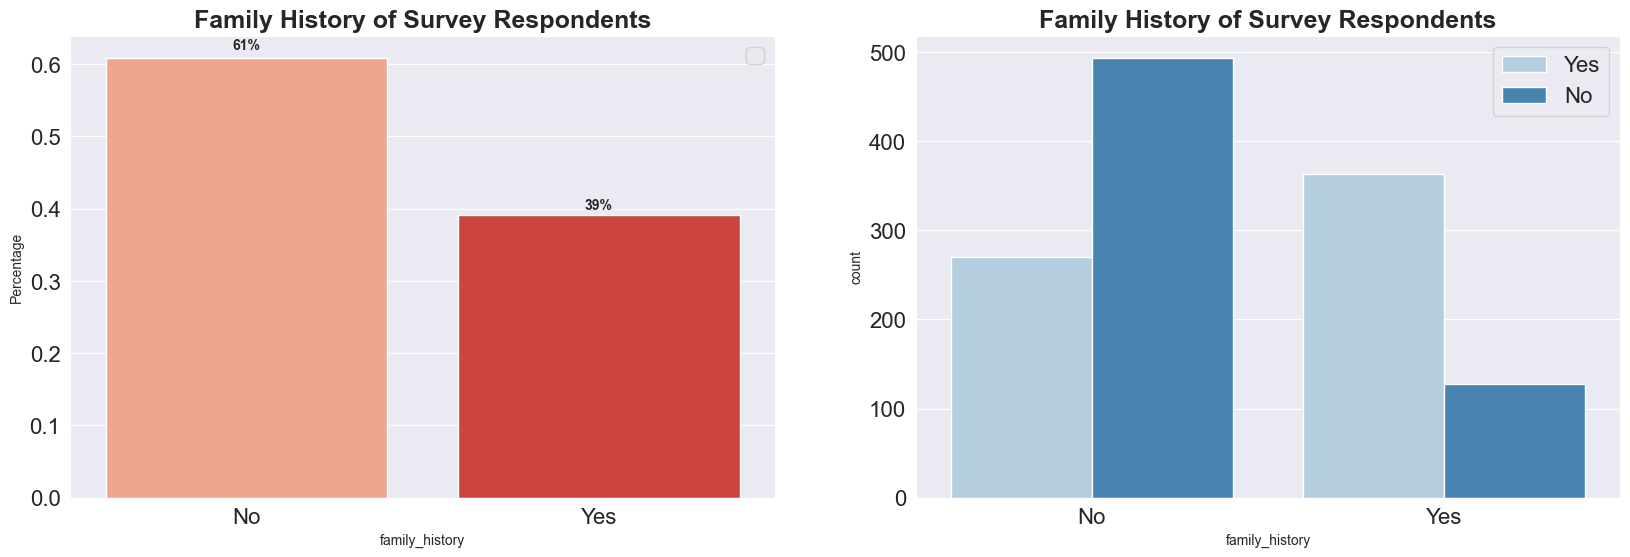

In [15]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Reds')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='family_history', hue = 'treatment',data=df, palette='Blues')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

This is the respondents answer to the question, 'Do you have a family history of mental illness?'.

From close to 40% of the respondents who say that they have a family history of mental illness, the plot shows that they significantly want to get treatment rather than without a family history. This is acceptable, remember the fact that people with a family history pay more attention to mental illness. Family history is a significant risk factor for many mental health disorders.

Thus, this is an important factor that has to be taken under consideration as it influences the behaviour of the employees to a significant extent.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


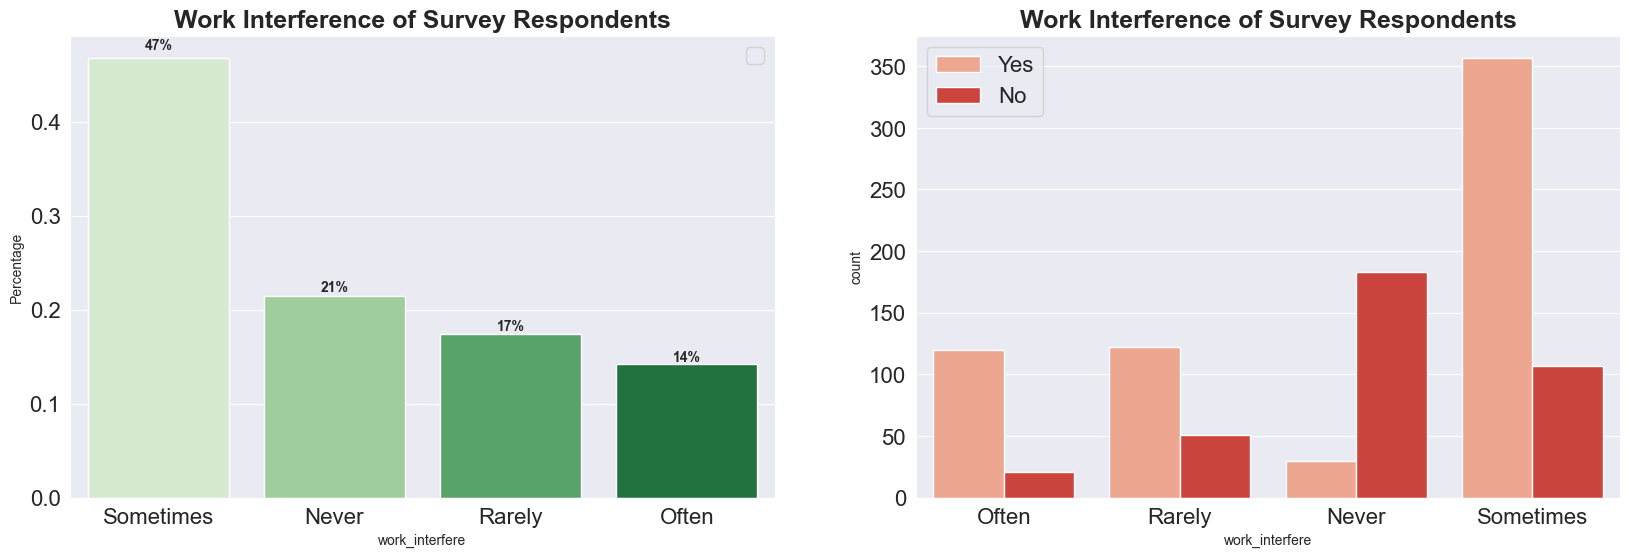

In [16]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='work_interfere', hue ='treatment',data=df, palette = 'Reds')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Inference:
This was the respondent's answer to the question, 'If you have a mental health condition, do you feel that it interferes with your work?'.

On seeing the first graph we conclude that around 48% of people say that sometimes work interefers with their mental health. Now 'Sometimes' is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.
Coming to our second graph, we see that the people who chose 'Sometimes' had the highest number of people who actually had a mental condition. Similar pattern was shown for the people who belonged to the *'Often category'.
But what is more surprising to know is that even for people whose mental health 'Never' has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the wo
We will be leaving the 'number_of_employees' category and move forward with the next column which is 'remote_work'.

rker.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


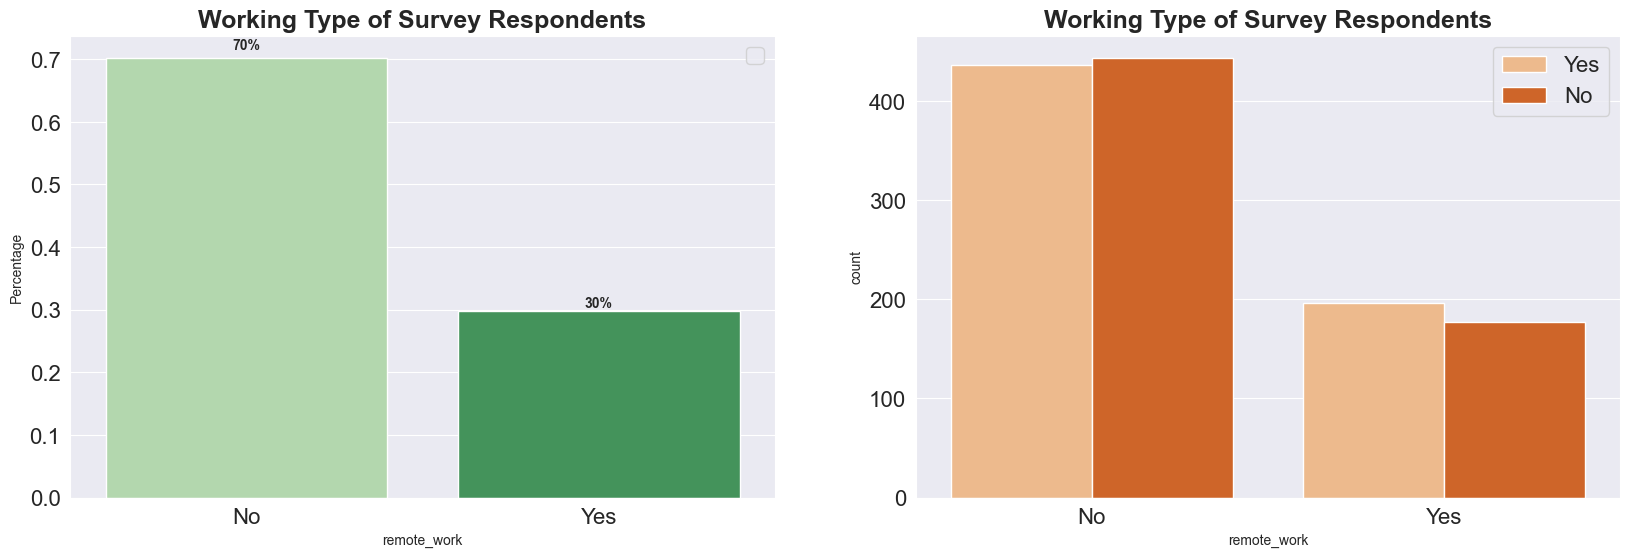

In [17]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='remote_work', hue = 'treatment',data=df, palette='Oranges')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Inference:
This was the respondent's answer to the question, 'Do you work remotely (outside of an office) at least 50% of the time?'.

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.

Let's move forward with our next variable which is 'tech_company'.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


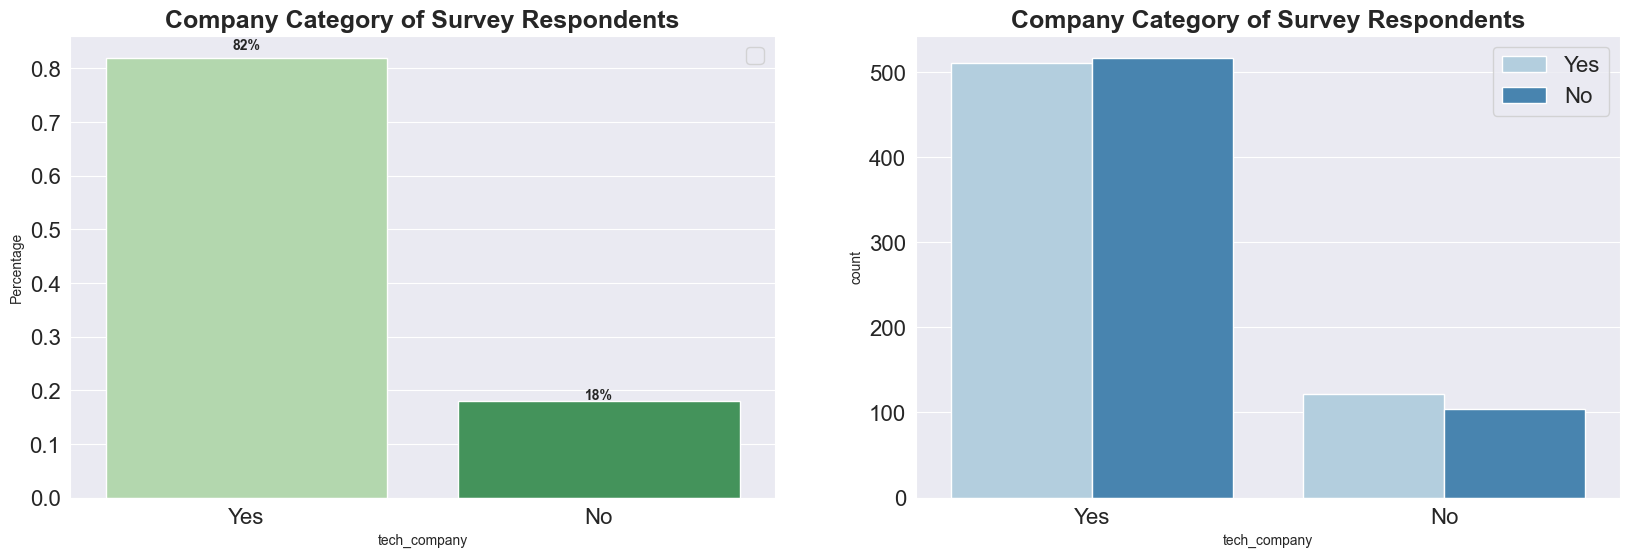

In [18]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='Greens')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='tech_company', hue = 'treatment',data=df, palette='Blues')
plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondents answer to the question, 'Is your employer primarily a tech company/organization?'.

Although the survey was specifically designed to be conducted in the tech field, there are close to 18% of the companies belonginf to the non tech field. However, looking at the second graph, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem.

However, on a deeper look we find that the number of employees in the tech sector who want to get treatment is slightly lower than the one's who don't. But in the non-tech field the situation gets reversed.

The next category that we'll be looking into is benefits!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


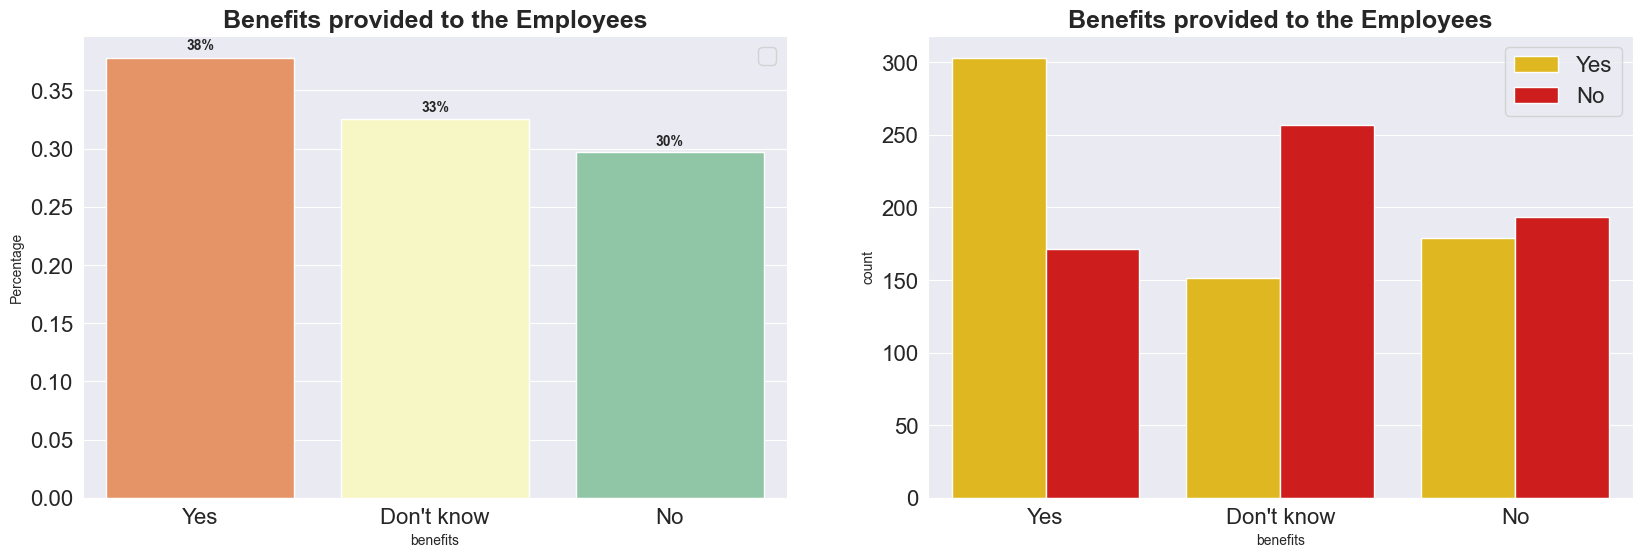

In [19]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Spectral')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='benefits', hue = 'treatment',data=df, palette='hot_r')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Inference:
This was the respondent's answer to the question, 'Does your employer provide mental health benefits?'.

We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
Coming to the second graph, we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help.
Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


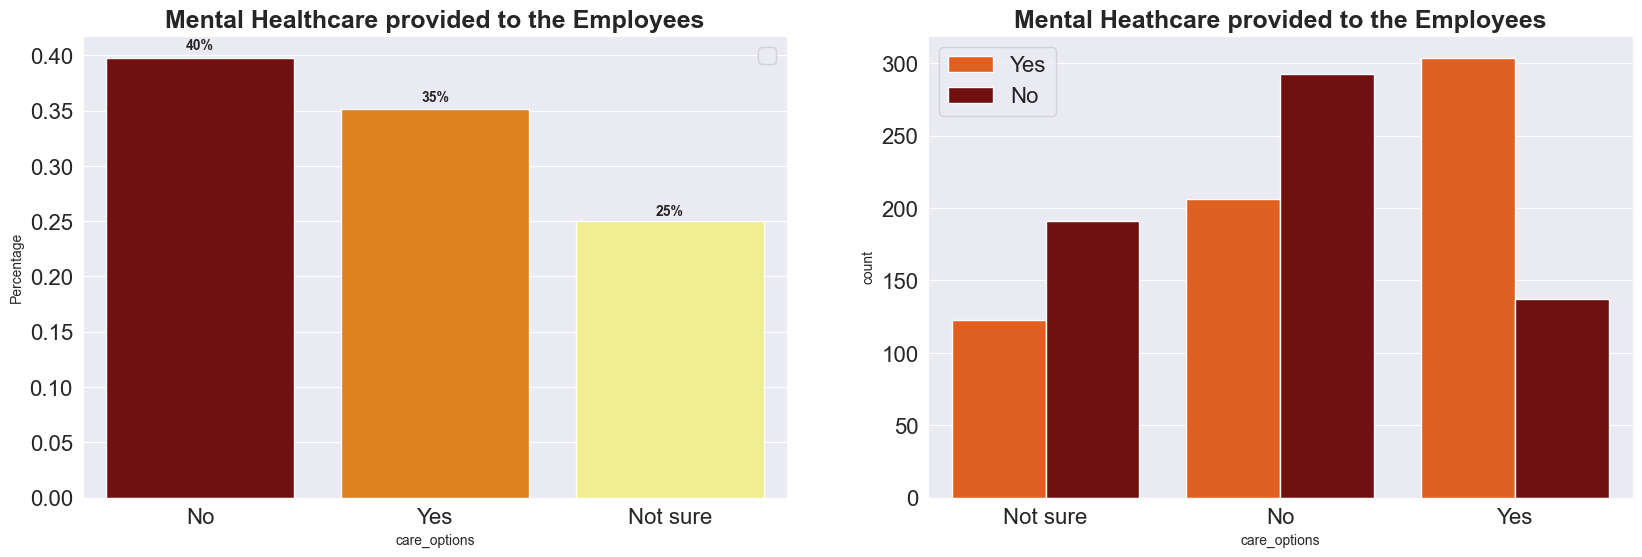

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='afmhot')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='care_options', hue = 'treatment',data=df, palette='gist_heat_r')
plt.title('Mental Heathcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This was the respondent's answer to the question, 'Do you know the options for mental health care your employer provides?'.

Since this graph is more or less similar to the benefits one, we won't be discussing it in more detail.

Moving forward, the next category is wellness program. Lets try understanding that!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


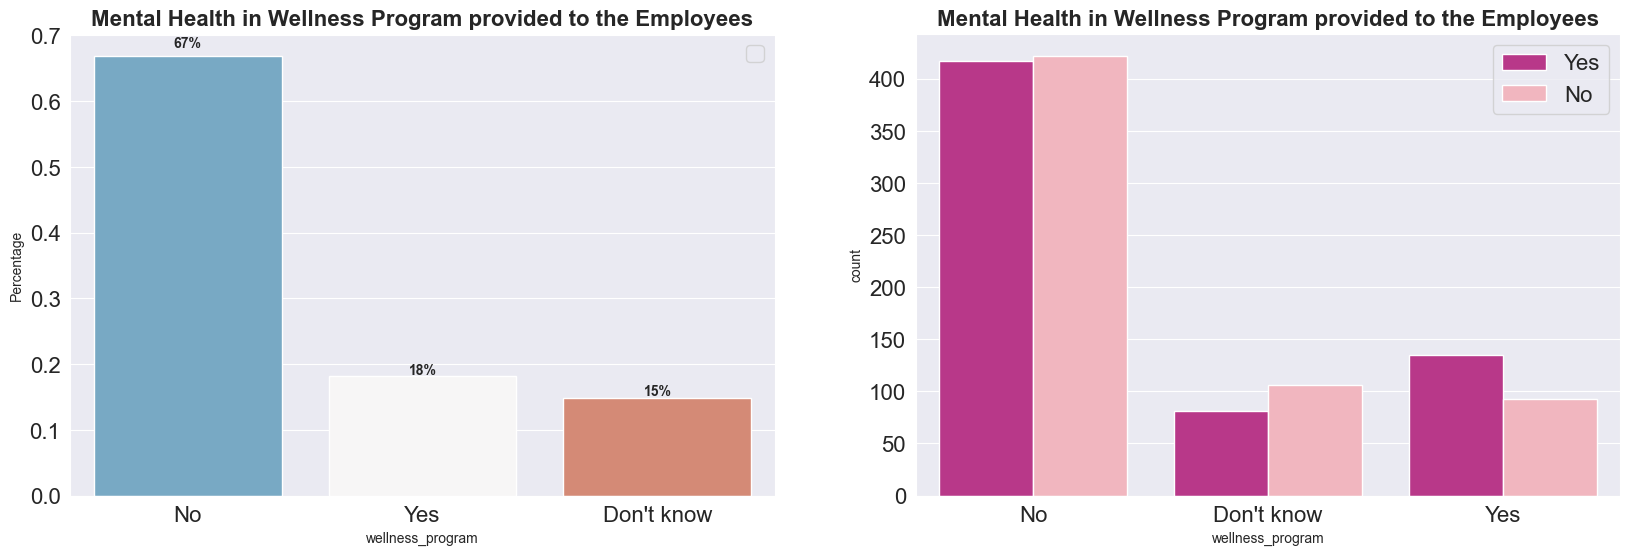

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='RdBu_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='wellness_program', hue = 'treatment',data=df, palette='RdPu_r')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Inference:
This is the respondents answer to the question, 'Has your employer ever discussed mental health as part of an employee wellness program?'.

About 19% of the repondents say YES about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment.
One shocking revealation is that more than 65% of respondents say that there aren't any wellness programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon.
The next category is seek_help, we will be leaving it as it is more or less similar to care_options, benefits and wellness_program. Our next category is anonymity.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


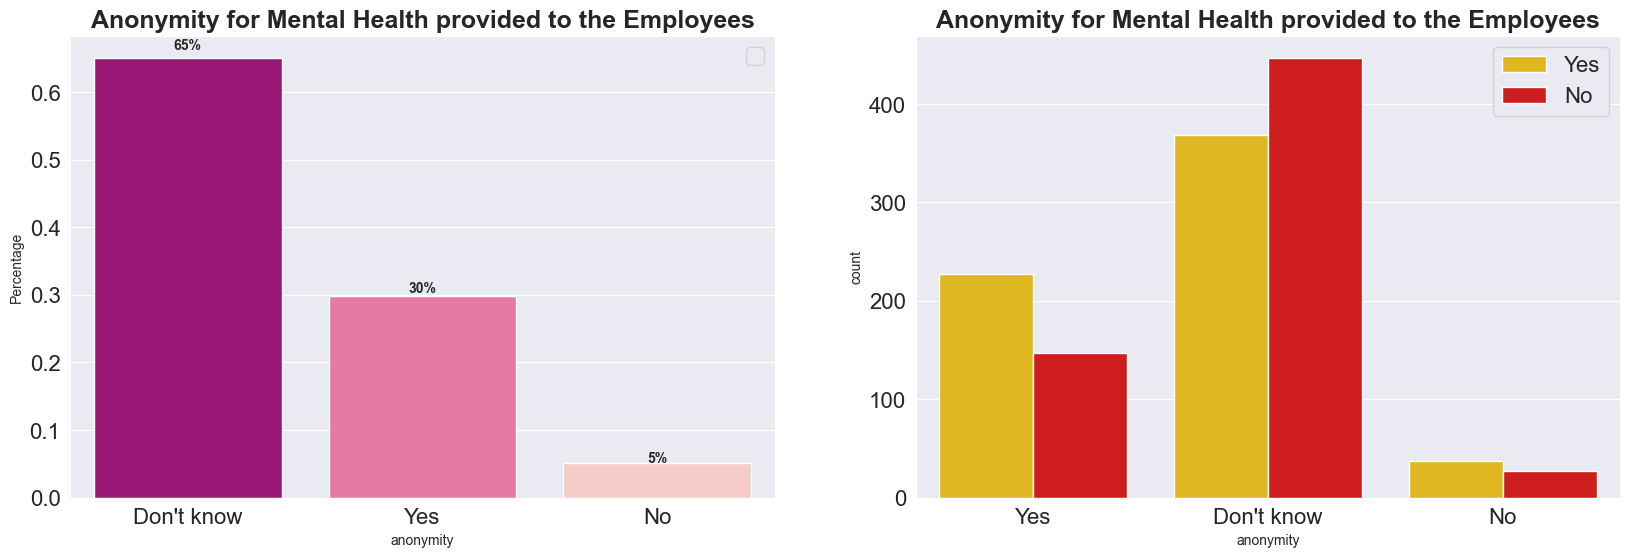

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='anonymity', hue ='treatment',data=df, palette='hot_r')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


Inference:
This is the respondent's answer to the question, 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?'.

Around 65% of the people were not aware whether anonymity was provided to them and 30% said yes to the provision of anonymity by the company.
Looking at the second graph, we see that out of the people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers. The most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.
The next factor that we will be discussing is 'leave.'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


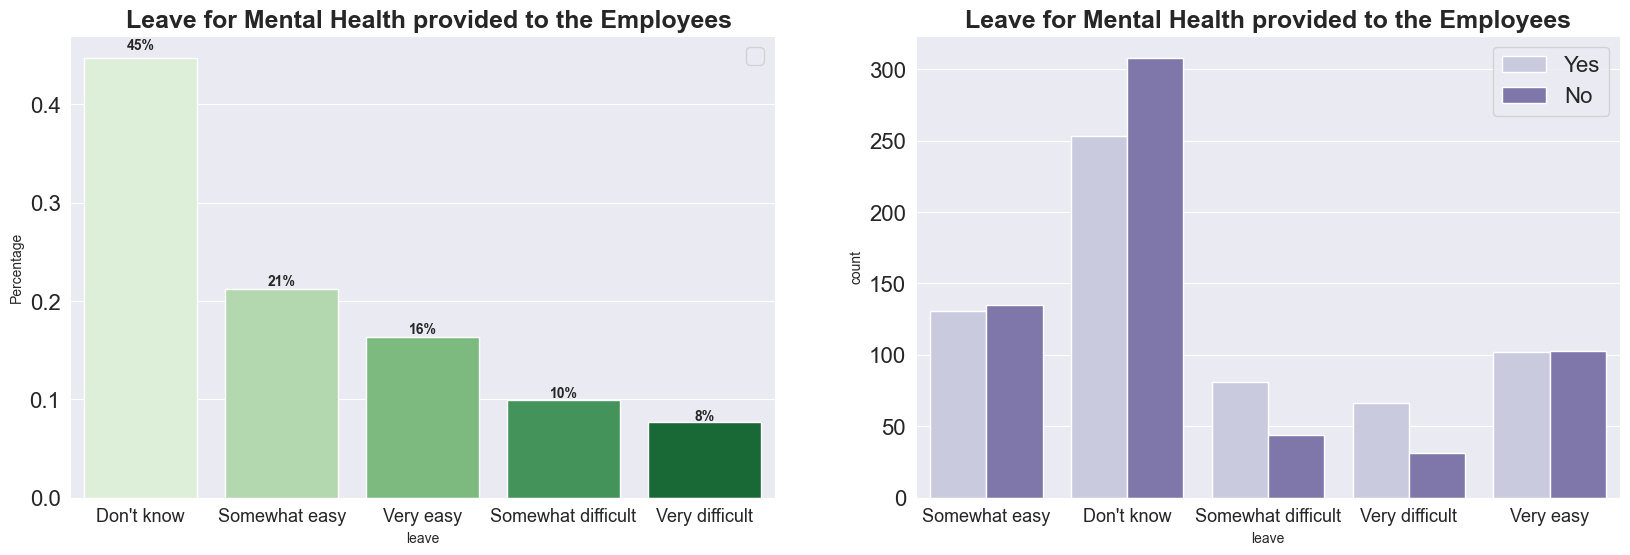

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='leave', hue = 'treatment',data=df, palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'How easy is it for you to take medical leave for a mental health condition?'

While close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
A small percent of people ( around 8% ) said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.
The next category that we'd be looking into is mental health consequence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


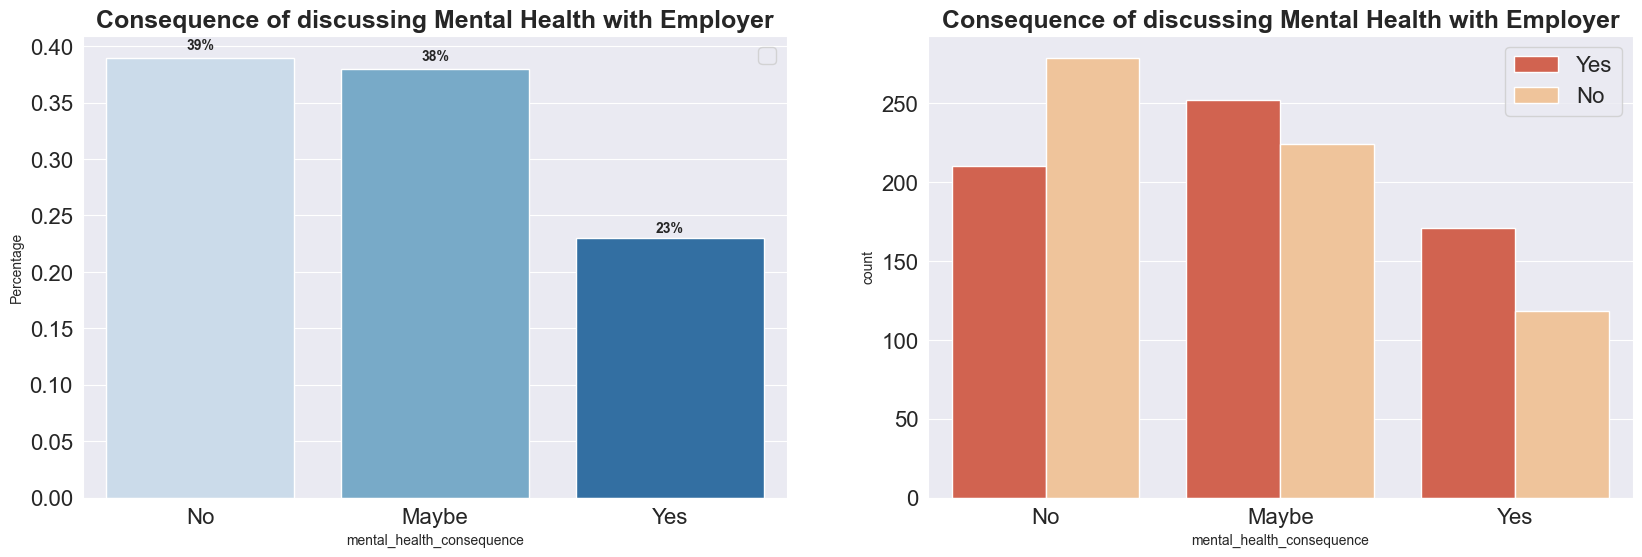

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_health_consequence', hue = 'treatment', data =df,palette='OrRd_r')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a mental health issue with your employer would have negative consequences?'.

Around same number of people ( around 40% each ) answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 23% said Yes to it.
23% is a significant number who feel that discussing their mental health might create a negative impact on their employer. This may be because of the stigma, decreased productivity, impact on promotions or any other preconcieved notion.
It is nice to know that out of the people who answered No, there were only around 40% of the people who actually sought after help, whereas in both the other categories, it is more than 50%.
The next factor that we are going to discuss is physical health consequence. It will be interesting to compare both of these two together.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


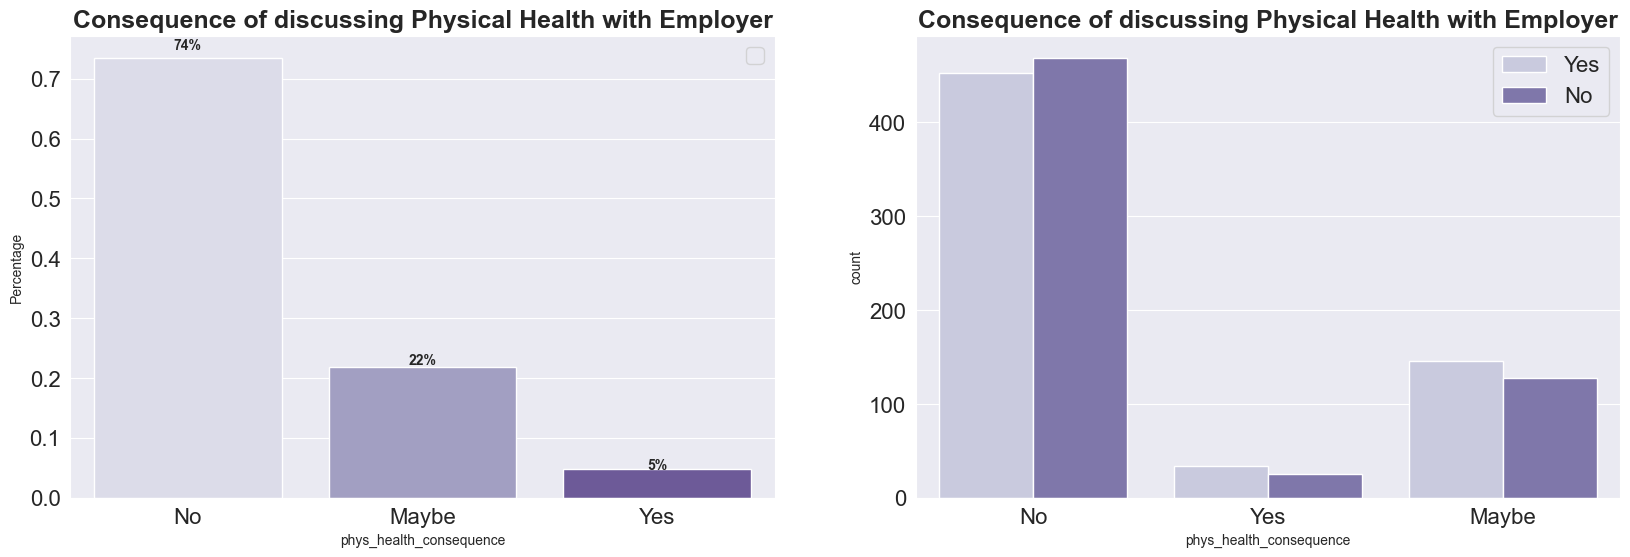

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='phys_health_consequence', hue = 'treatment',data=df, palette='Purples')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a physical health issue with your employer would have negative consequences?'

There is a starking difference between the reponses for the same question regarding mental and physical health. More than 70% of the employees believe that their physical health does not create a negative impact on their employer and only 5% of them believes that it does.
While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, we must keep in mind about how differently mental and physical health are treated as a whole.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


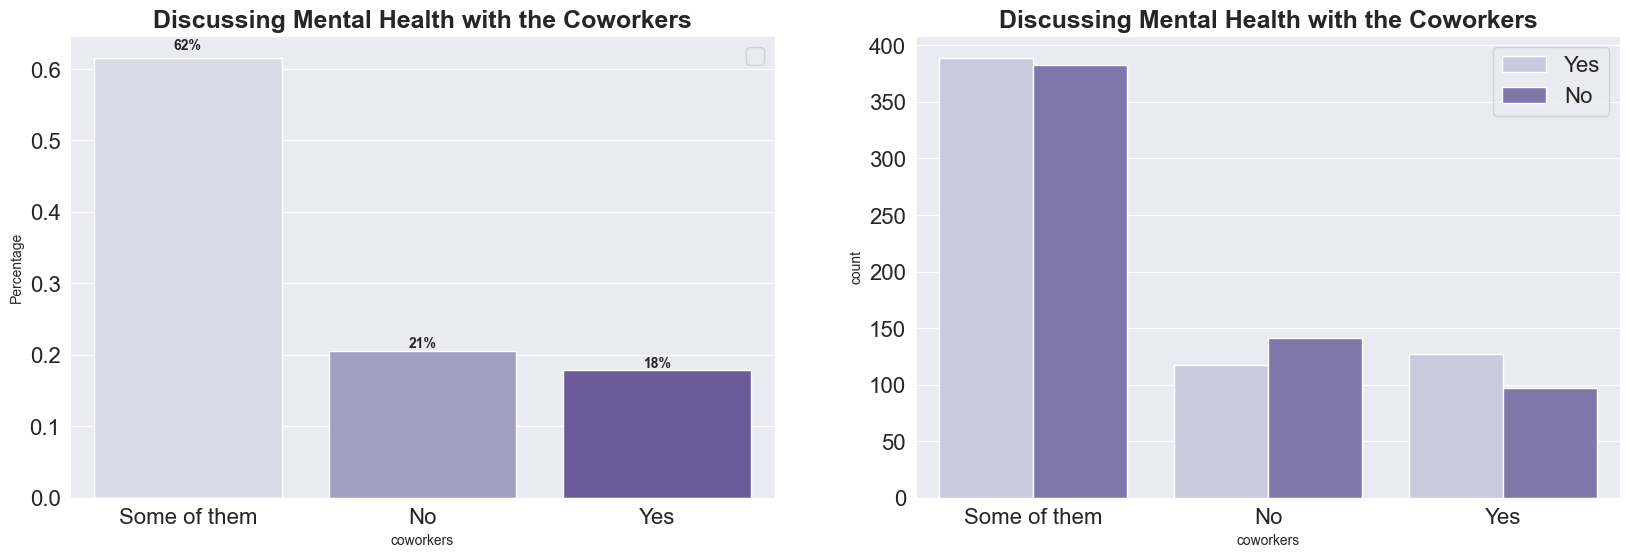

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='coworkers', hue = 'treatment',data=df, palette='Purples')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you be willing to discuss a mental health issue with your coworkers?'

Around 62% of the employees said that they might be comfortable discussing some type of mental problems with their coworkers, and out of them around 50% actually sought for medical help.
20% of the employees believed that discussing mental health with their coworkers wasn't a good option for them.
The next category is supervisor. Lets find out whether the employees are comfortable sharing their mental health with their supervisor.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


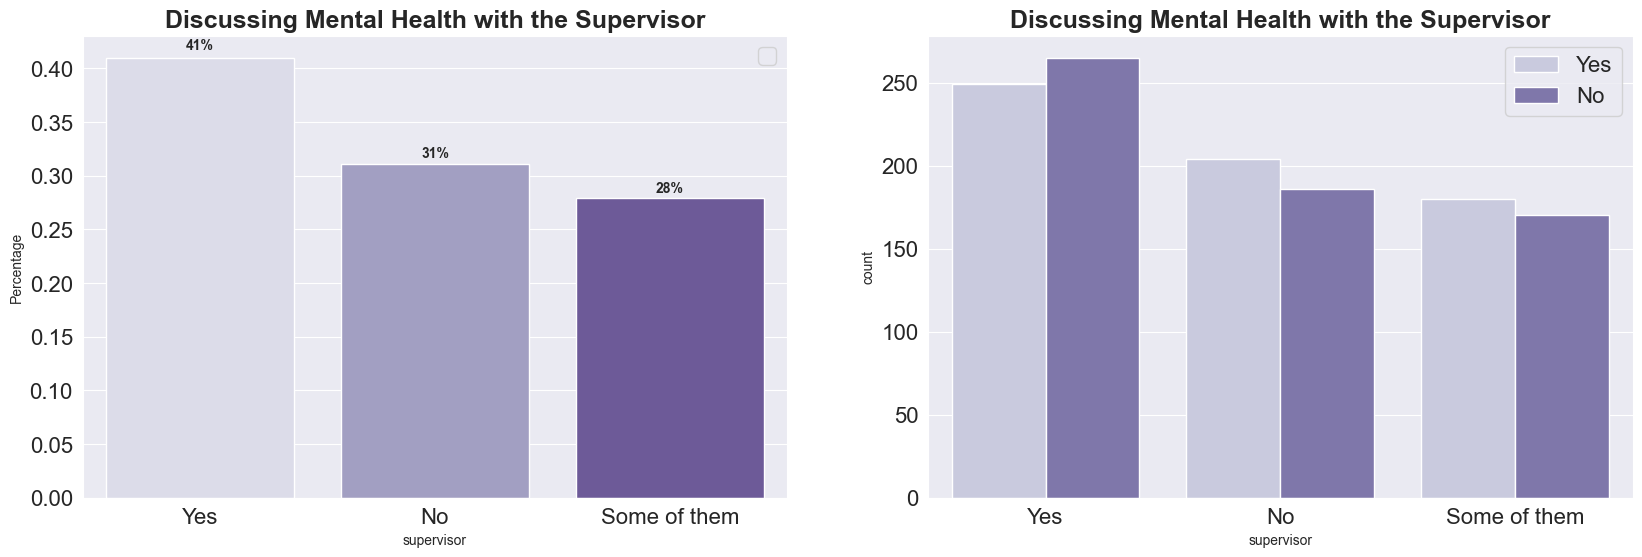

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='supervisor', hue = 'treatment',data=df, palette='Purples')
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you be willing to discuss a mental health issue with your direct supervisor(s)?'.

This graph is quite different from the one of the coworker. Here, around 40% of the workers believe in sharing their mental health with their supervisors. This may have something to do with their performance etc.
Looking at the second graph, employees who actually sought for help regarding their mental health was more or less similar for all the three categories.
This has become really tiring now! Anyway, just 2-3 categories more left for analysis. Let's move forward with our next variable, which is 'mental_health_interview'



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


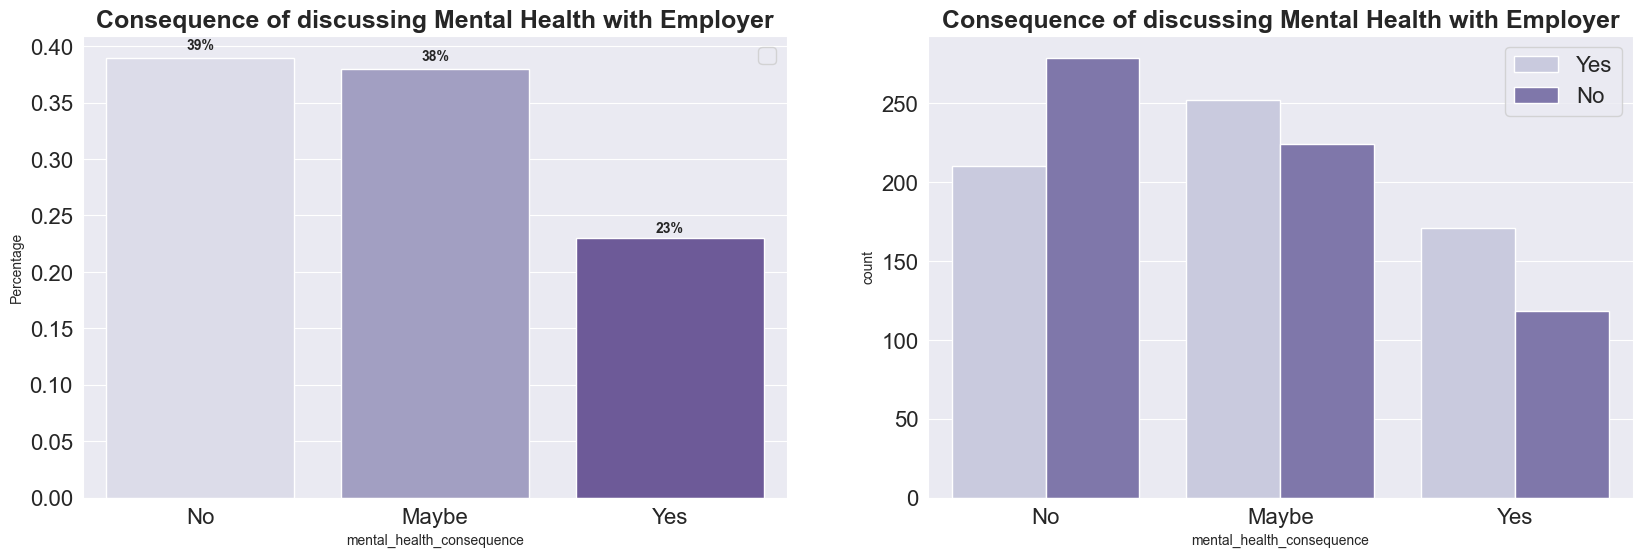

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_health_consequence', hue = 'treatment',data=df, palette='Purples')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a mental health issue with your employer would have negative consequences?'.

As our intution might suggest us, 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. This is actually a good thing! This might not have been the case 15 years ago.
While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.
The next category is physical_health_interview. Let's see if there's any difference in the respondent's answer for this one with the previous one.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


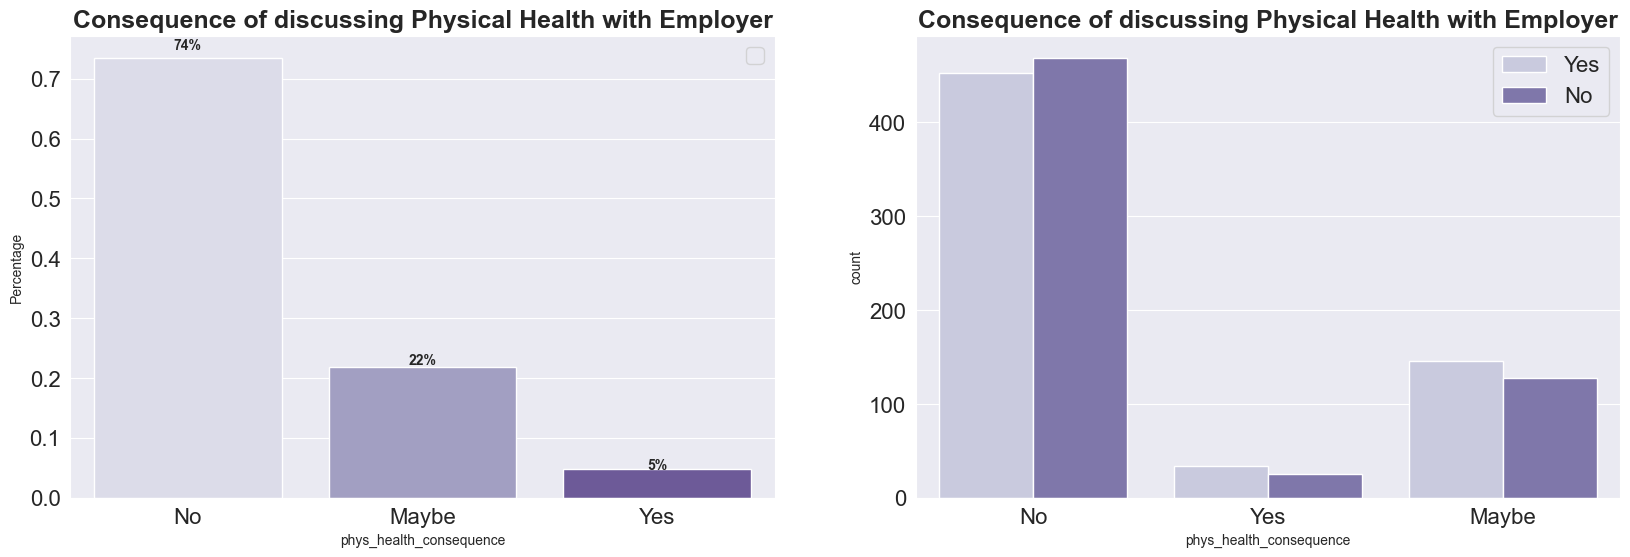

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='phys_health_consequence', hue = 'treatment',data=df, palette='Purples')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you bring up a physical health issue with a potential employer in an interview?'.

While a majority of the people are still dubious about discussing their physical health condition with the future employer, however, close to 17% believe that there is no issue in discussing their physical health conditions.
Around 50% of the people still remain confused about whether it is a good option to discuss their condition or not.
Coming to the last but one, mental_vs_physical. Let's see what insights can be drawn from this category!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


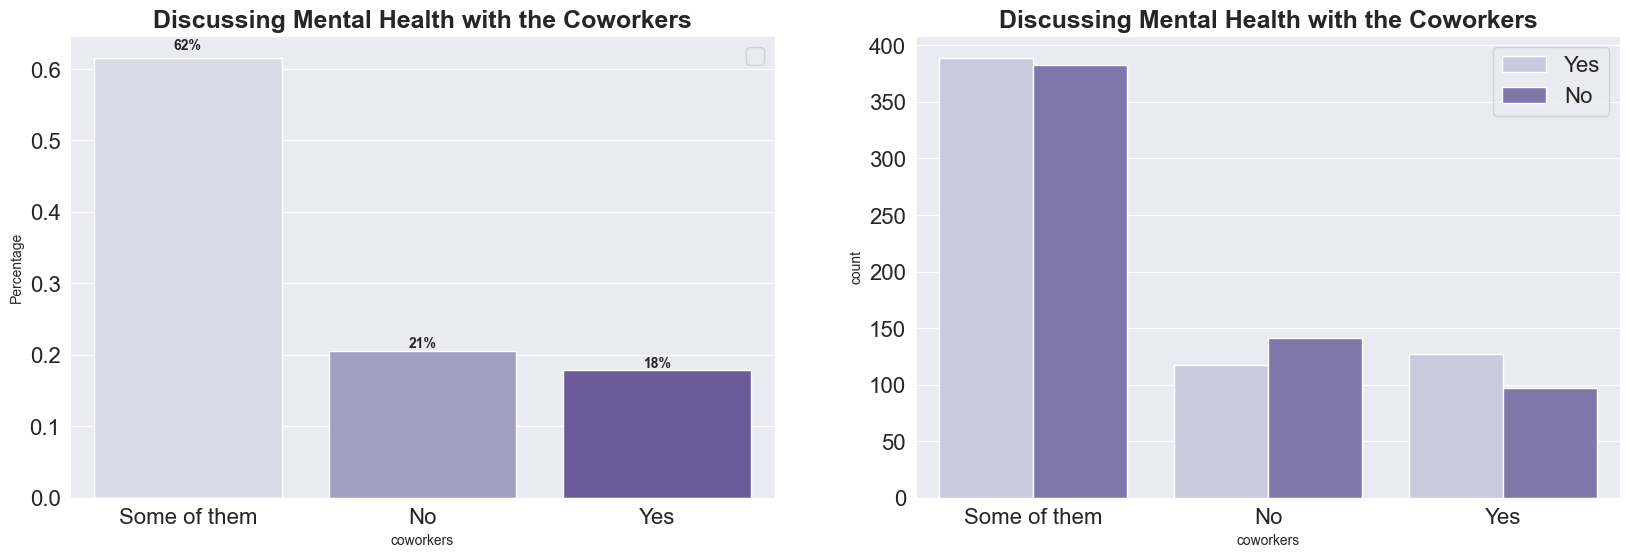

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='coworkers', hue = 'treatment',data=df, palette='Purples')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you be willing to discuss a mental health issue with your coworkers?'

Around 62% of the employees said that they might be comfortable discussing some type of mental problems with their coworkers, and out of them around 50% actually sought for medical help.
20% of the employees believed that discussing mental health with their coworkers wasn't a good option for them.
The next category is supervisor. Lets find out whether the employees are comfortable sharing their mental health with their supervisor.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


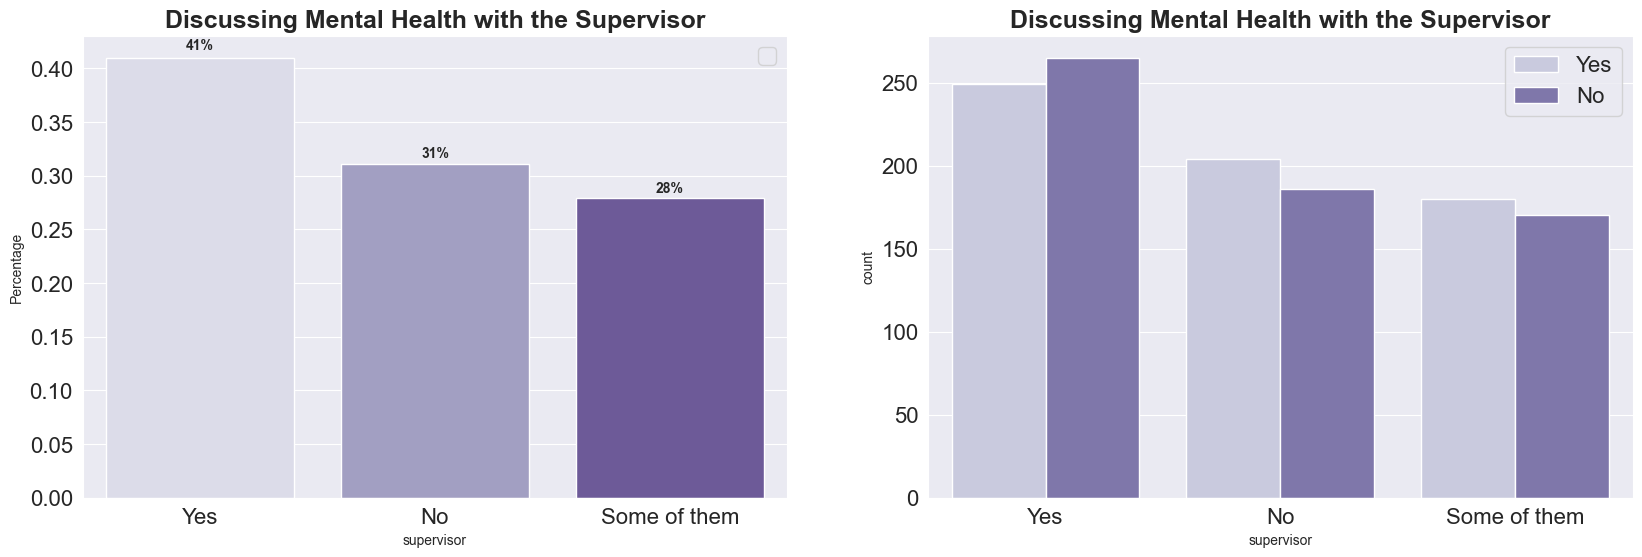

In [31]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='supervisor', hue = 'treatment',data=df, palette='Purples')
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you be willing to discuss a mental health issue with your direct supervisor(s)?'.

This graph is quite different from the one of the coworker. Here, around 40% of the workers believe in sharing their mental health with their supervisors. This may have something to do with their performance etc.
Looking at the second graph, employees who actually sought for help regarding their mental health was more or less similar for all the three categories.
This has become really tiring now! Anyway, just 2-3 categories more left for analysis. Let's move forward with our next variable, which is 'mental_health_interview'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


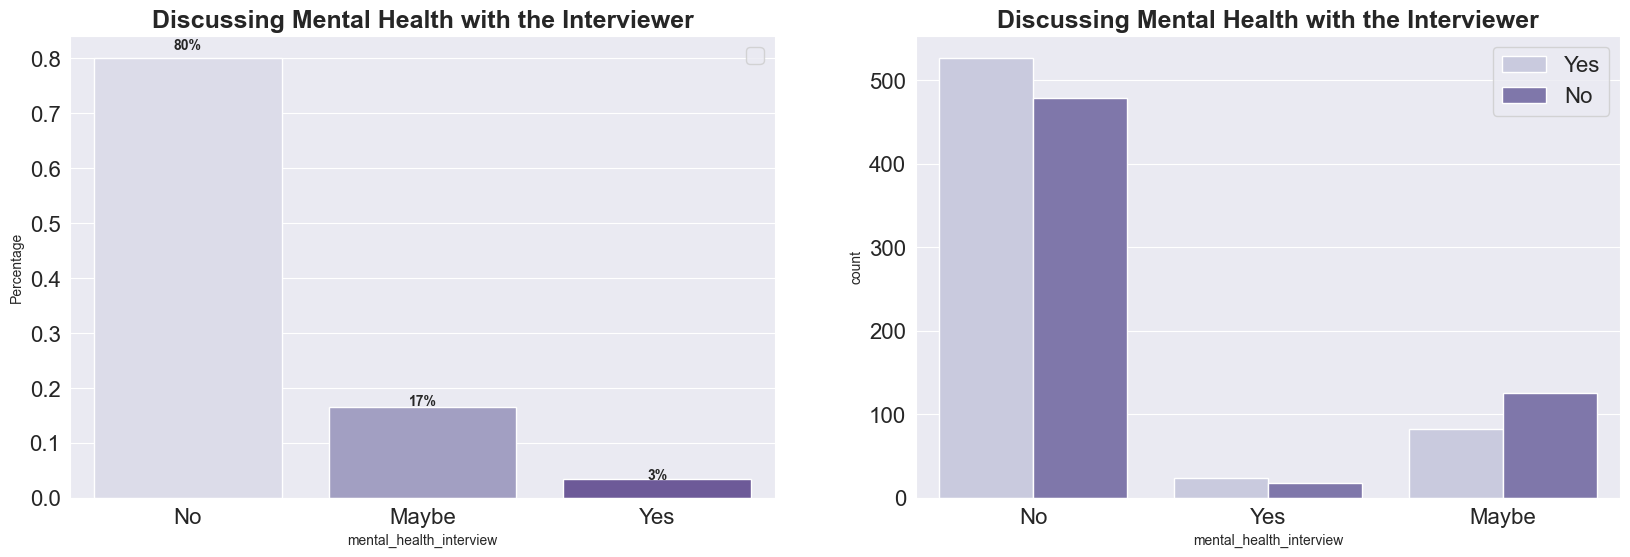

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_health_interview', hue = 'treatment',data=df, palette='Purples')
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a mental health issue with your employer would have negative consequences?'.

As our intution might suggest us, 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. This is actually a good thing! This might not have been the case 15 years ago.
While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.
The next category is physical_health_interview. Let's see if there's any difference in the respondent's answer for this one with the previous one.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


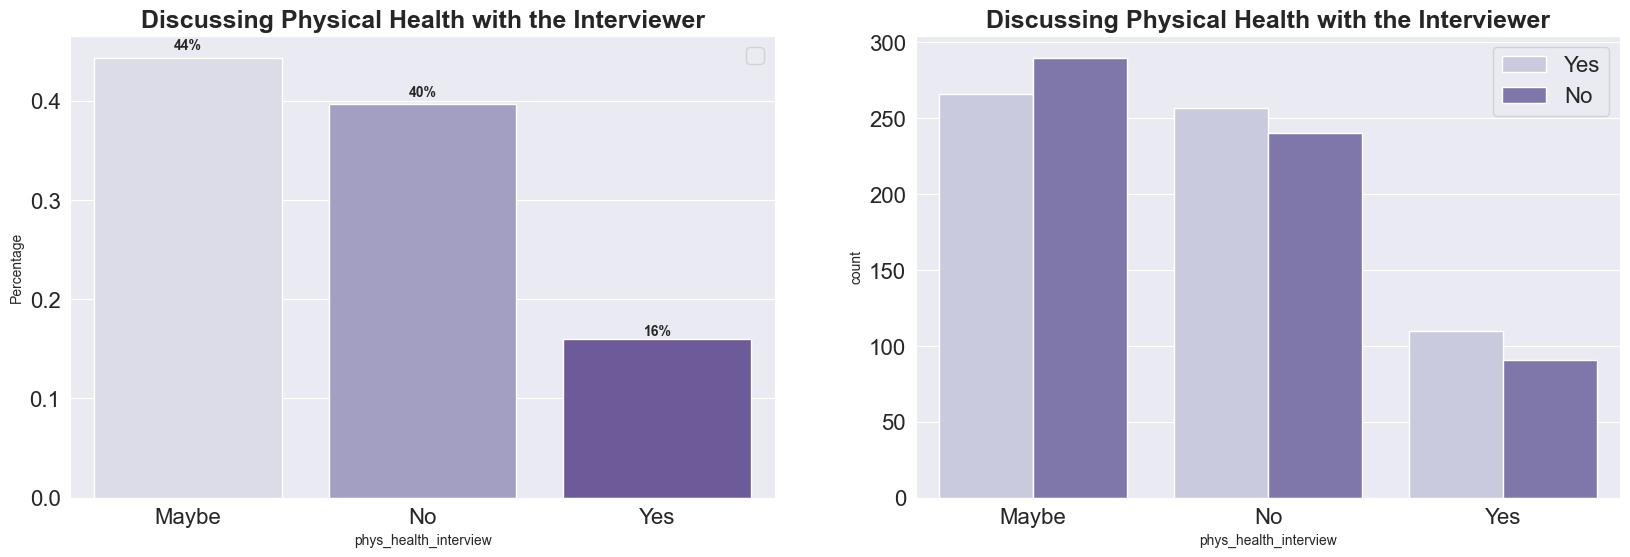

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='phys_health_interview', hue = 'treatment',data=df, palette='Purples')
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you bring up a physical health issue with a potential employer in an interview?'.

While a majority of the people are still dubious about discussing their physical health condition with the future employer, however, close to 17% believe that there is no issue in discussing their physical health conditions.
Around 50% of the people still remain confused about whether it is a good option to discuss their condition or not.
Coming to the last but one, mental_vs_physical. Let's see what insights can be drawn from this category!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


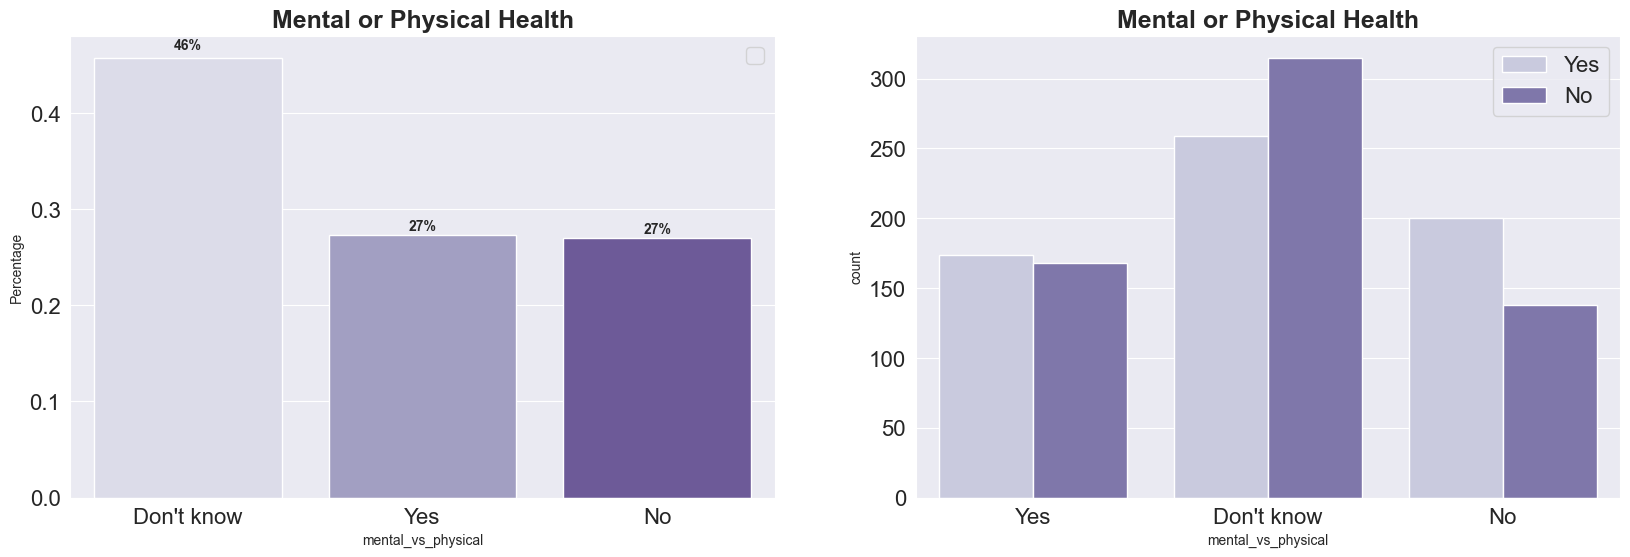

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_vs_physical', hue = 'treatment',data=df, palette='Purples')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This was the respondent's answer to the question, 'Do you feel that your employer takes mental health as seriously as physical health?'

While close to 50% people said that they didn't know, the number of people who answered Yes as well as No were completely equal.
For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.
Coming to the last column, we have finally reached to obs_consequence. This definitely calls for a meme!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


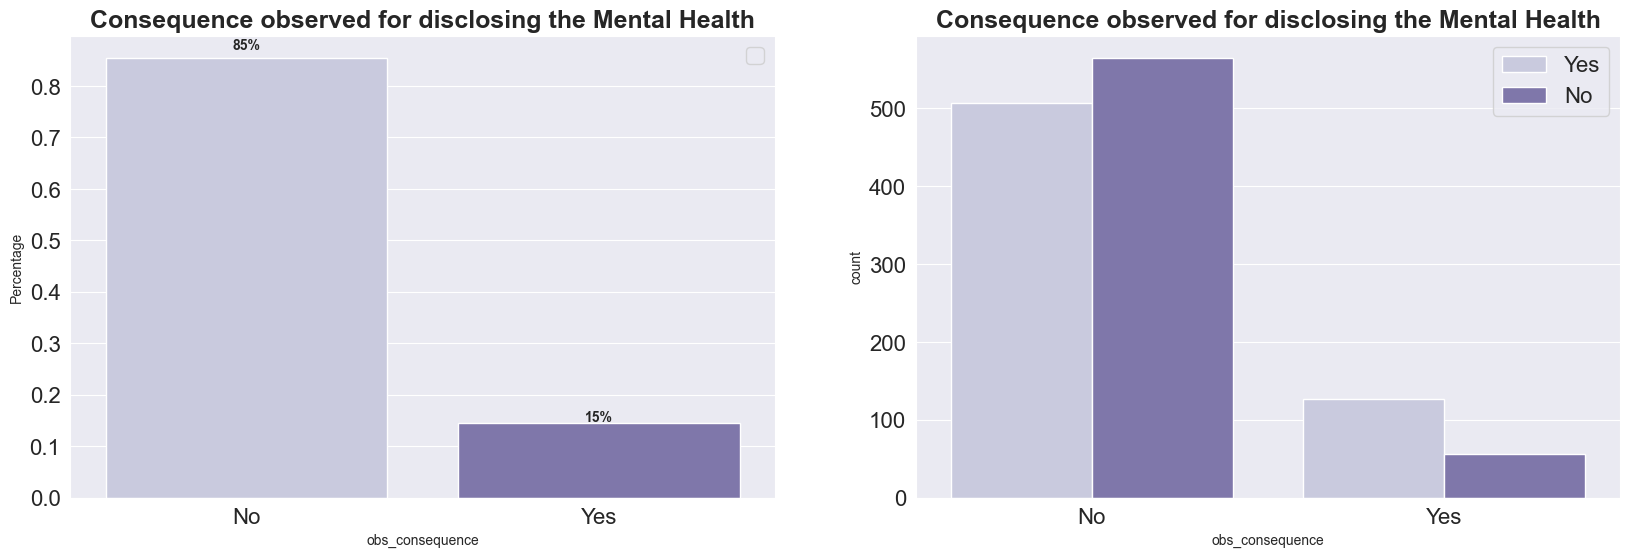

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='obs_consequence', hue = 'treatment',data=df, palette='Purples')
    
plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This was the respondent's answer to the question, 'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'

Majority ( 85% ) of the people, answered No to this question. This is quite important to note that IT being an organised sector, follows strict guidelines of employee satisfaction etc. Thus, we didn't come across any major issue regarding the employer behavior as such!
Anyway, I think we're done with the EDA. Let me know if we left something out and I will try top cover that as well!

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

Note: We have only two columns left that contain null values - work_interfere and self_employed. Let us try to fill these null values and make our data ready for further processing.

Since, there are only 20% of work_interfere so let's change NaN to "Don't know.
There are only 1.4% of self employed so let's change NaN to NOT self_employed
We will be replacing the blank values with 'Don't Know' for work_interfere category and for the

In [37]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [38]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [39]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [40]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))
    

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['Jun-25' 'More than 1000' '26-100' '100-500' '01-May' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH

In [41]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [42]:
df['treatment'].value_counts()

treatment
1    633
0    621
Name: count, dtype: int64

We can see that the target column, i.e 'treatment' has almost equal values for both the categories. This means that we do not have to perform undersampling or oversampling.
Now let us make a heatmap and try to understand the correlation of various features with the target variable.

<Axes: >

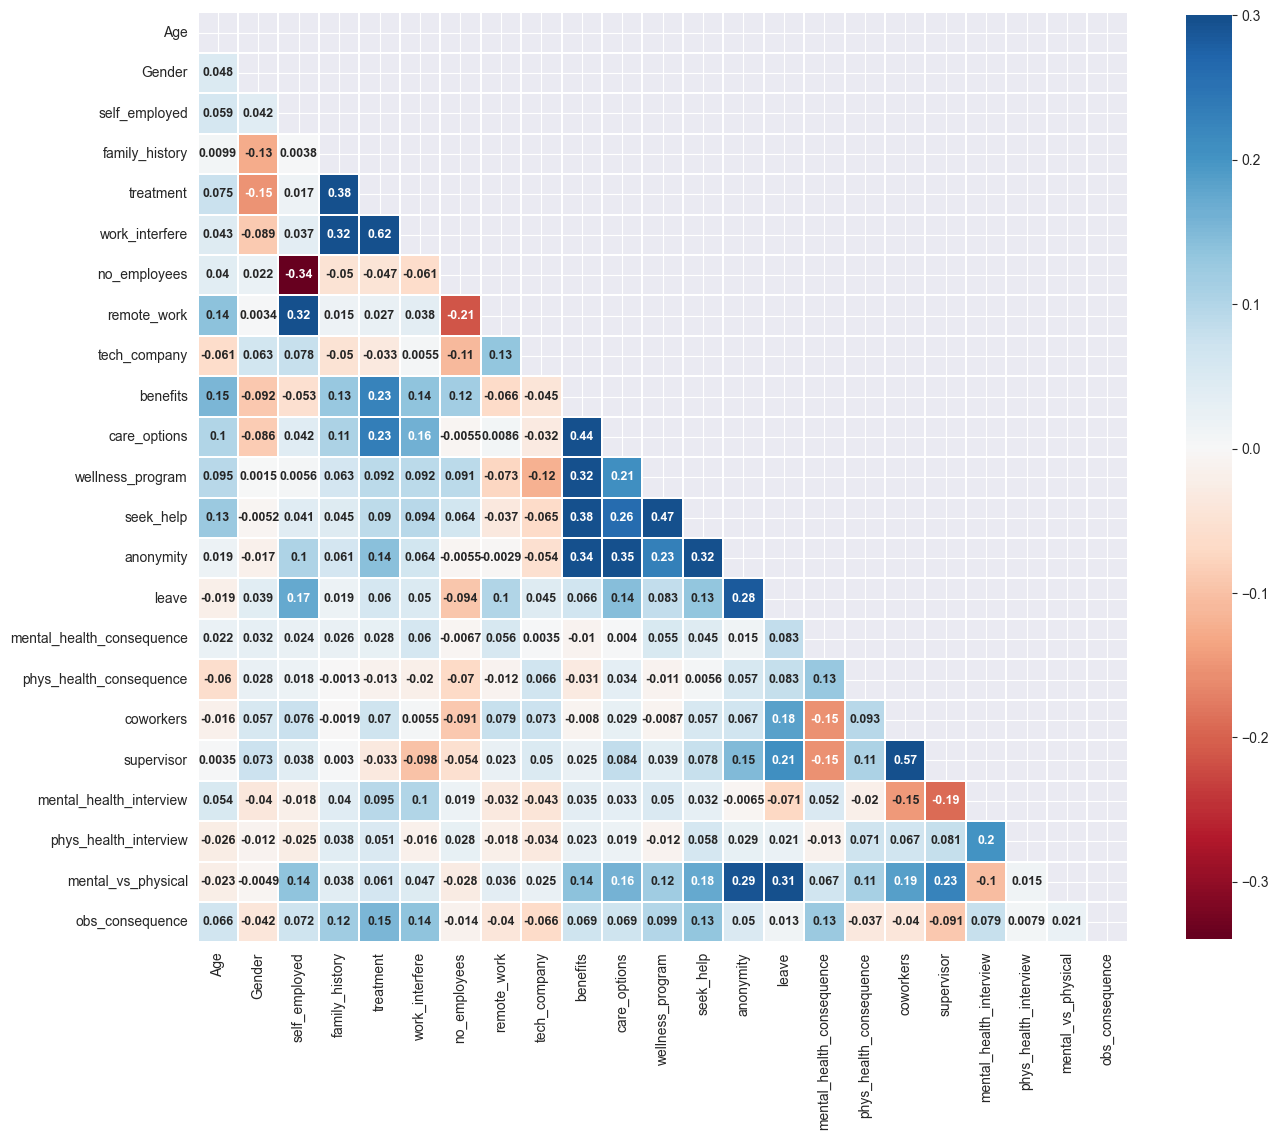

In [43]:
# Compute the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=0.25, cbar_kws={"shrink": 0.8}, annot = True,annot_kws={'fontsize':9,'fontweight':'bold'})

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score,RocCurveDisplay, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

In [45]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [46]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, m

In [47]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8037135278514589
KNeighborsClassifier 0.6631299734748011
DecisionTreeClassifier 0.7214854111405835
RandomForestClassifier 0.7771883289124668
GradientBoostingClassifier 0.8116710875331565
AdaBoostClassifier 0.8010610079575596
XGBClassifier 0.7931034482758621


Text(0.5, 1.0, 'Plotting the Model Accuracies')

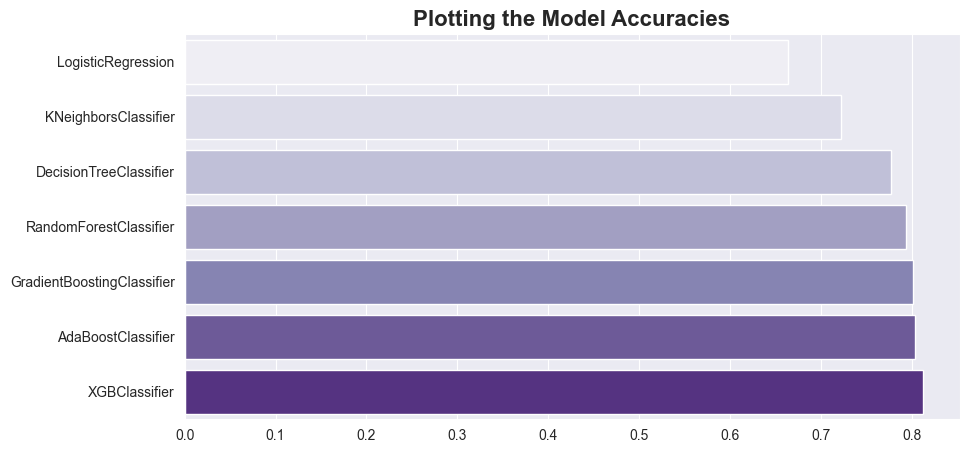

In [48]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(50.722222222222214, 0.5, 'Actual')

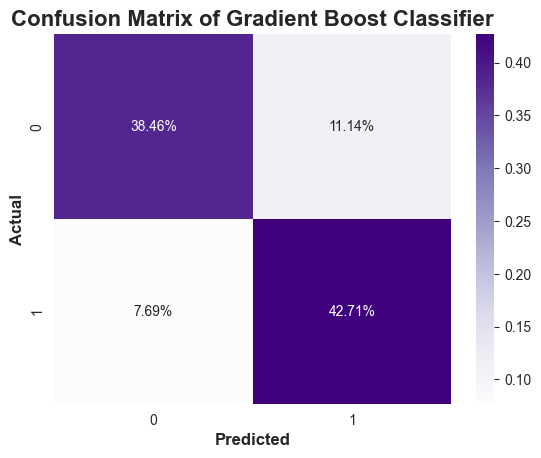

In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

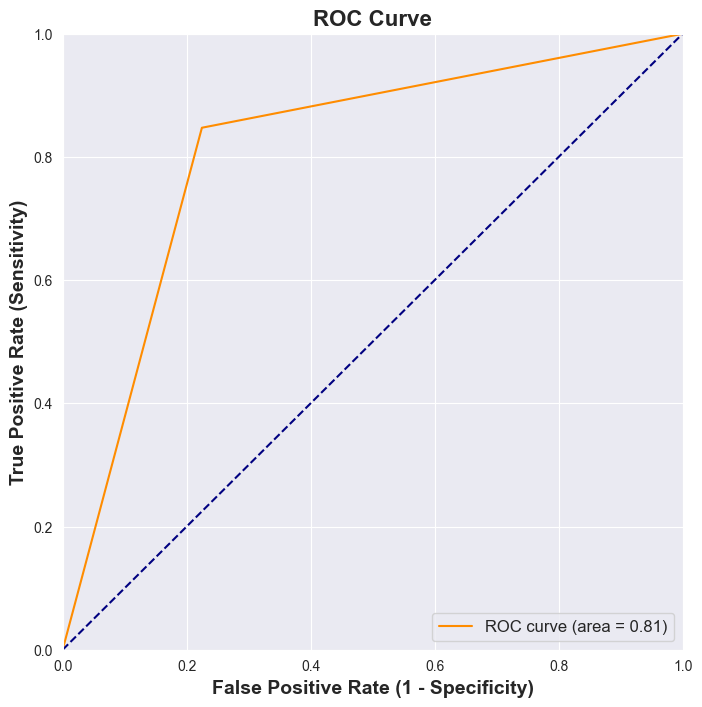

(array([0.        , 0.22459893, 1.        ]),
 array([0.        , 0.84736842, 1.        ]),
 array([inf,  1.,  0.]))

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Text(49.722222222222214, 0.5, 'Actual')

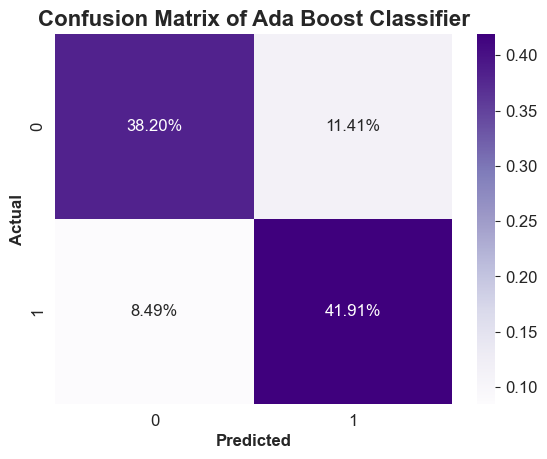

In [51]:
from sklearn.ensemble import AdaBoostClassifier
gbc = AdaBoostClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Ada Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

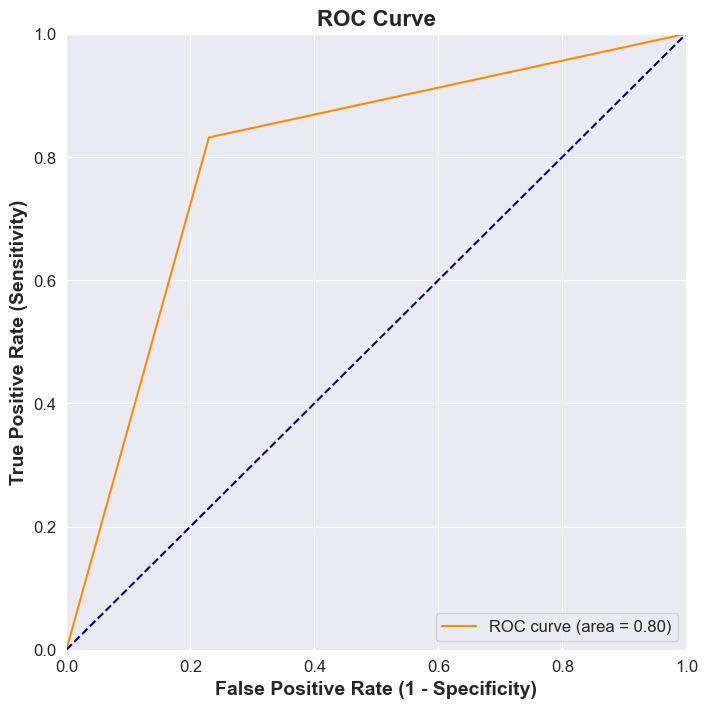

(array([0.        , 0.22994652, 1.        ]),
 array([0.        , 0.83157895, 1.        ]),
 array([inf,  1.,  0.]))

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Text(49.722222222222214, 0.5, 'Actual')

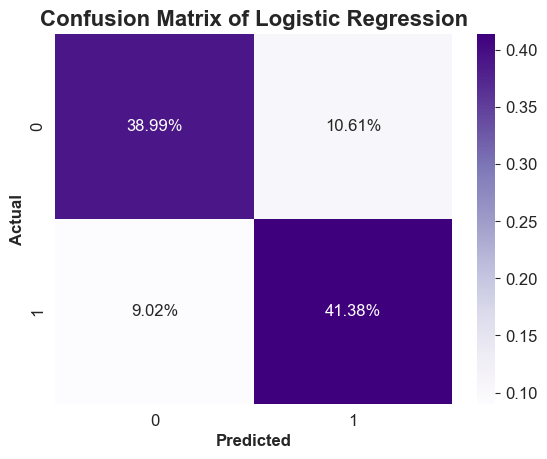

In [53]:
gbc = LogisticRegression()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Logistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

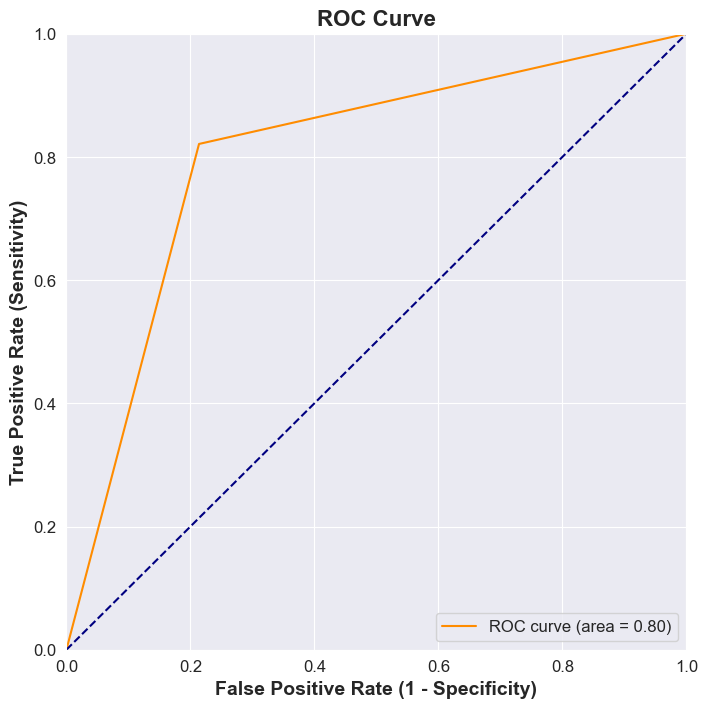

(array([0.        , 0.21390374, 1.        ]),
 array([0.        , 0.82105263, 1.        ]),
 array([inf,  1.,  0.]))

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Text(49.722222222222214, 0.5, 'Actual')

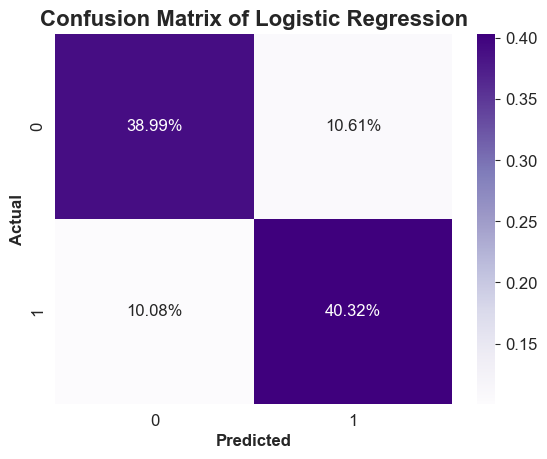

In [57]:
gbc = XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=0)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Logistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

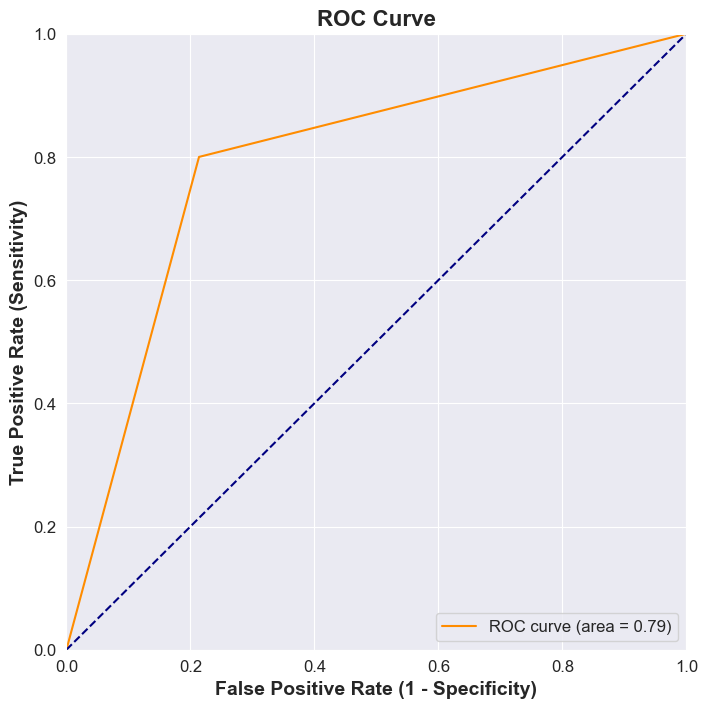

(array([0.        , 0.21390374, 1.        ]),
 array([0. , 0.8, 1. ]),
 array([inf,  1.,  0.]))

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Text(49.722222222222214, 0.5, 'Actual')

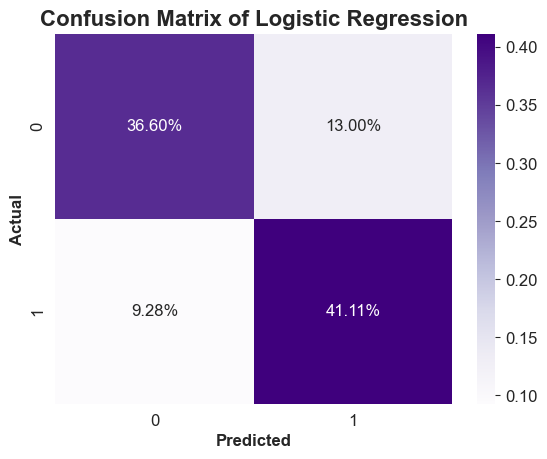

In [59]:
gbc = RandomForestClassifier(n_estimators=60, random_state=0)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Logistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

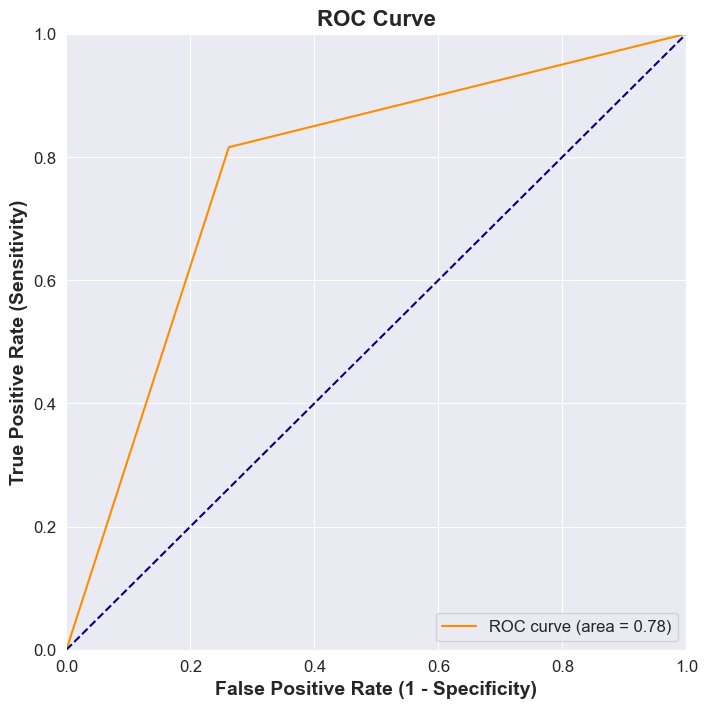

(array([0.        , 0.26203209, 1.        ]),
 array([0.        , 0.81578947, 1.        ]),
 array([inf,  1.,  0.]))

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Text(49.722222222222214, 0.5, 'Actual')

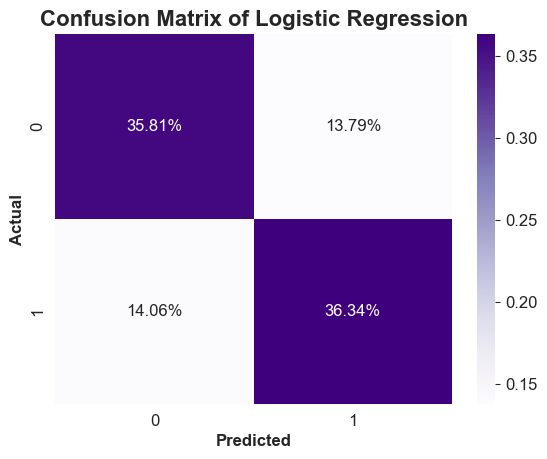

In [61]:

gbc = DecisionTreeClassifier(random_state=10)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Logistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

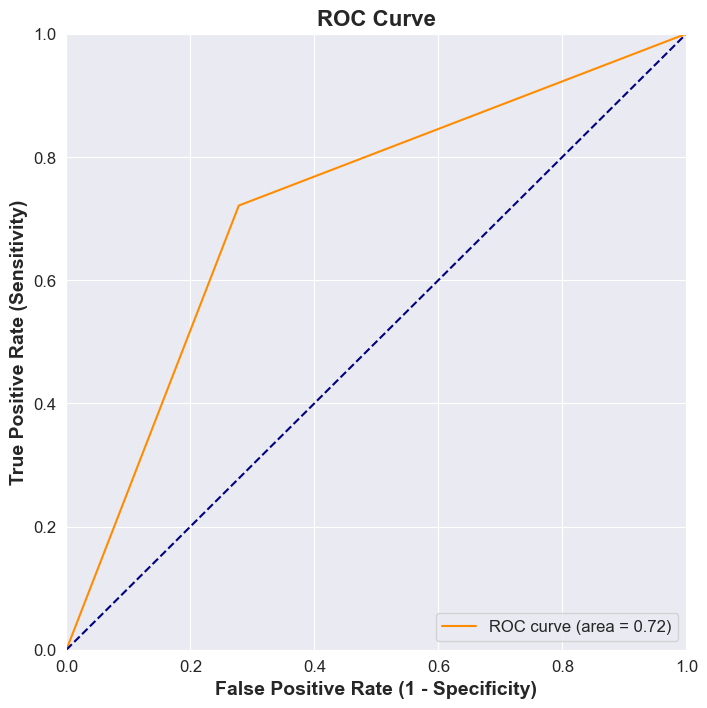

(array([0.        , 0.27807487, 1.        ]),
 array([0.        , 0.72105263, 1.        ]),
 array([inf,  1.,  0.]))

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Text(49.722222222222214, 0.5, 'Actual')

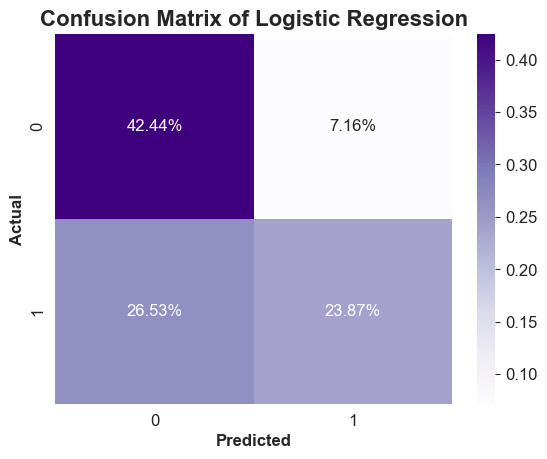

In [63]:

gbc = KNeighborsClassifier(n_neighbors=2)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Logistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)


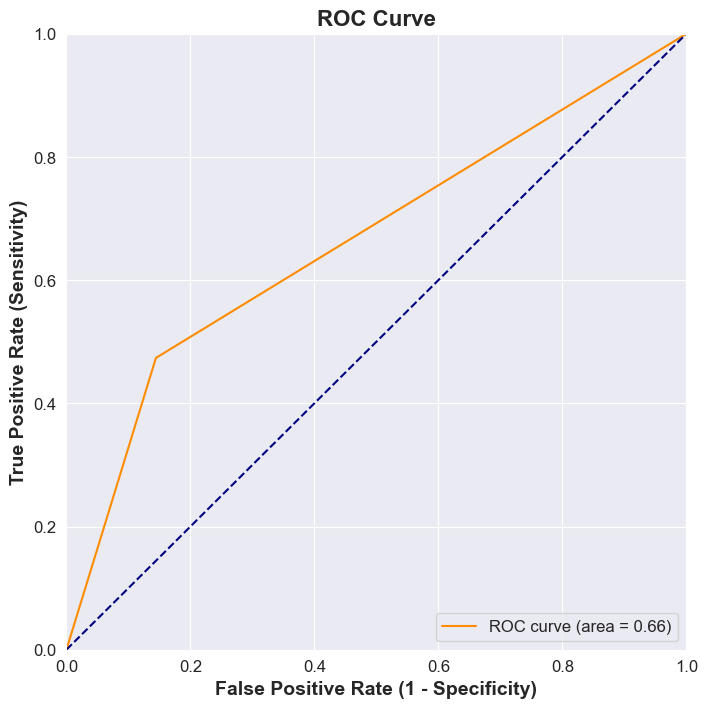

(array([0.        , 0.14438503, 1.        ]),
 array([0.        , 0.47368421, 1.        ]),
 array([inf,  1.,  0.]))

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)